#  Use Case: Teacher Workforce Planning

**Authored by:** Saneli Wijesinghe  
**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, pandas, data cleaning, exploratory data analysis (EDA)

---

##  Scenario

_As a data analyst working with the Victorian Government education department, I need to evaluate if current teacher workforce distribution aligns with the population of children aged 0–12 years across different regions. This insight will help support future hiring and school planning decisions._

---

##  What this use case will teach you

This use case teaches you how to:
- Load and clean datasets from CSV and Excel formats
- Explore and understand demographic and workforce data
- Compare regional data between children and teachers
- Identify mismatches to assist in planning

---

##  At the end of this use case, you will:

- Be able to read real-world government datasets using Python  
- Identify missing or misaligned data across two different sources  
- Derive insights useful for decision-making using data  
- Learn to interpret CSV and Excel data structures

---

##  Background

This project combines two publicly available datasets:

- **Families with Children Profile **: Offers demographic insights into children aged 0–12 in Victoria  
- **Teacher Workforce Snapshot **: A supplementary report on the distribution of teachers across regions  

The objective is to understand whether the teacher workforce is proportionate to the child population, helping improve staffing models and planning in Victoria’s schools.


In [6]:
import pandas as pd
import requests

# ---------------------------
# 1. Load Families Dataset from JSON API (Export endpoint)
# ---------------------------
families_url = (
    "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
    "families-with-children-profile-2016-aged-0-12-years/exports/json"
)

families_response = requests.get(families_url)
if families_response.status_code == 200:
    families_json = families_response.json()
    families_df = pd.json_normalize(families_json)
    print(" Families dataset loaded via export endpoint")
    display(families_df.head())
else:
    print(" Failed to load families dataset:", families_response.status_code)


# ---------------------------
# 2. Load Teachers Dataset from Excel (Skip header metadata)
# ---------------------------
# URL to the Excel file
teachers_url = (
    "https://www.education.vic.gov.au/Documents/"
    "school/teachers/profdev/careers/"
    "Teacher-Workforce-Snapshot-2023_Supplementary-data.xlsx"
)

# Load only the "2.1 Supply and demand" sheet and skip metadata
teachers_df = pd.read_excel(
    teachers_url,
    sheet_name='2.1 Supply and demand',
    skiprows=6,
    engine='openpyxl'
)

# Drop completely empty rows
teachers_df = teachers_df.dropna(how='all')

print(" Teacher supply/demand dataset loaded and cleaned")
display(teachers_df.head())



 Families dataset loaded via export endpoint


,profile,census_year,category,sub_category,sub_order,value
0,Families with children 0-5 years,2016,Country of birth - detailed,Malaysia,4,265
1,Families with children 0-5 years,2016,Country of birth - detailed,Vietnam,6,139
2,Families with children 0-5 years,2016,Providing child care,Child care not applicable,6,5175
3,Families with children 0-5 years,2016,Personal weekly income - overview,Income not applicable,5,5175
4,Families with children 6-8 years,2016,Proficiency in English,Speaks other language and speaks English: Very...,2,693


 Teacher supply/demand dataset loaded and cleaned


,Table 2.1.1: Forecast supply of early childhood teachers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Year,Registered,Recruitable Supply,Supply,NaN,NaN
1,2023,10821.92,8522.126856,7627.762856,NaN,NaN
2,2024,13164.92,10367.210097,9279.211801,NaN,NaN
3,2025,13615.59491,10722.11096,9596.867202,NaN,NaN
4,2026,13898.636869,10945.002969,9796.367563,NaN,NaN


In [7]:
# EDA: Families Dataset

# Shape and preview
print("Shape of Families dataset:", families_df.shape)
display(families_df.head())

# Check column data types
print("\nData Types:")
print(families_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(families_df.isnull().sum())

# Unique profiles and categories
print("\nUnique Profiles:", families_df['profile'].unique())
print("\nUnique Categories:", families_df['category'].unique())


Shape of Families dataset: (671, 6)


,profile,census_year,category,sub_category,sub_order,value
0,Families with children 0-5 years,2016,Country of birth - detailed,Malaysia,4,265
1,Families with children 0-5 years,2016,Country of birth - detailed,Vietnam,6,139
2,Families with children 0-5 years,2016,Providing child care,Child care not applicable,6,5175
3,Families with children 0-5 years,2016,Personal weekly income - overview,Income not applicable,5,5175
4,Families with children 6-8 years,2016,Proficiency in English,Speaks other language and speaks English: Very...,2,693



Data Types:
profile         object
census_year     object
category        object
sub_category    object
sub_order        int64
value            int64
dtype: object

Missing Values:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64

Unique Profiles: ['Families with children 0-5 years' 'Families with children 6-8 years'
 'Families with children 9-12 years' 'Families with children 0-12 years'
 'Other family with child under 15 years'
 'Families with no children 0-14 years'
 'Families with children 13-14 years' 'Total all families']

Unique Categories: ['Country of birth - detailed' 'Providing child care'
 'Personal weekly income - overview' 'Proficiency in English'
 'Labour force status - detailed' 'Personal weekly income - detailed'
 'Country of birth - overview' 'Year of arrival'
 'Language spoken at home - detailed'
 'Need for assistance with core activities' 'Housing tenure'
 'Vehicle ownership' 'Population (perso

In [8]:
# EDA: Teacher Supply Dataset

# Shape and preview
print("Shape of Teacher Supply dataset:", teachers_df.shape)
display(teachers_df.head())

# Check column data types
print("\nData Types:")
print(teachers_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(teachers_df.isnull().sum())




Shape of Teacher Supply dataset: (324, 6)


,Table 2.1.1: Forecast supply of early childhood teachers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Year,Registered,Recruitable Supply,Supply,NaN,NaN
1,2023,10821.92,8522.126856,7627.762856,NaN,NaN
2,2024,13164.92,10367.210097,9279.211801,NaN,NaN
3,2025,13615.59491,10722.11096,9596.867202,NaN,NaN
4,2026,13898.636869,10945.002969,9796.367563,NaN,NaN



Data Types:
Table 2.1.1: Forecast supply of early childhood teachers    object
Unnamed: 1                                                  object
Unnamed: 2                                                  object
Unnamed: 3                                                  object
Unnamed: 4                                                  object
Unnamed: 5                                                  object
dtype: object

Missing Values:
Table 2.1.1: Forecast supply of early childhood teachers      0
Unnamed: 1                                                   69
Unnamed: 2                                                  127
Unnamed: 3                                                  148
Unnamed: 4                                                  172
Unnamed: 5                                                  306
dtype: int64


In [9]:
# Keep only relevant 4 columns (drop the last two)
clean_teachers_df = teachers_df.iloc[:, 0:4]

# Rename columns correctly
clean_teachers_df.columns = ['Year', 'Registered', 'Recruitable Supply', 'Supply']

# Drop rows where 'Year' is not a number (in case of headers/footers)
clean_teachers_df = clean_teachers_df[clean_teachers_df['Year'].astype(str).str.isnumeric()]

# Convert to correct types
clean_teachers_df = clean_teachers_df.astype({
    'Year': int,
    'Registered': float,
    'Recruitable Supply': float,
    'Supply': float
})

# Final preview
display(clean_teachers_df.head())


,Year,Registered,Recruitable Supply,Supply
1,2023,10821.920000,8522.126856,7627.762856
2,2024,13164.920000,10367.210097,9279.211801
3,2025,13615.594910,10722.110960,9596.867202
4,2026,13898.636869,10945.002969,9796.367563
5,2027,14023.805289,11043.571536,9884.591743


In [10]:
# Convert `census_year` to integer if needed
families_df['census_year'] = families_df['census_year'].astype(int)

# Strip whitespaces from strings (if any)
families_df['profile'] = families_df['profile'].str.strip()
families_df['category'] = families_df['category'].str.strip()
families_df['sub_category'] = families_df['sub_category'].str.strip()

# Confirm missing values
print(families_df.isnull().sum())

# Drop rows with missing critical values (optional based on needs)
families_df.dropna(subset=['value'], inplace=True)


profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64


##  Data Preparation and Exploratory Analysis

In the above sections, I prepared and explored two datasets — the **Families Dataset** and the **Teacher Workforce Dataset** — which form the foundation for understanding potential gaps in teacher supply and demand based on population trends.

---

### Dataset Overview

1. **Families Dataset**
   - Sourced via API from the City of Melbourne Open Data Portal.
   - Contains demographic data on families with children, useful for estimating future educational demand.
   - Loaded and cleaned using pandas; missing values handled, and string fields stripped of whitespace.
   - Key columns:
     - `profile`: Age group (e.g., *Families with children 0–5 years*).
     - `census_year`: Year of census (mostly 2016).
     - `category`: Broad demographic variable (e.g., *Country of birth*).
     - `sub_category`: Specific breakdown (e.g., *Malaysia*).
     - `value`: Count of families matching the category/subcategory.

2. **Teacher Workforce Dataset**
   - Extracted from the Department of Education’s Excel report.
   - Cleaned to remove formatting issues, extra header rows, and empty columns.
   - Focused on the *Forecast supply of early childhood teachers* table.
   - Final columns used:
     - `Year`: Forecast year.
     - `Registered`: Total registered early childhood teachers.
     - `Recruitable Supply`: Subset available to enter or re-enter the workforce.
     - `Supply`: Effective forecasted supply.

---

###  Data Cleaning Summary

**Families Dataset**
- Converted `census_year` to integer for easier filtering.
- Removed extra spaces from string columns (`profile`, `category`, `sub_category`).
- Dropped rows with missing `value` entries, which are essential for analysis.
- Confirmed the dataset has no missing values remaining.

**Teacher Workforce Dataset**
- Selected only relevant columns (`Year`, `Registered`, `Recruitable Supply`, `Supply`) and dropped extras.
- Converted all columns to proper numeric types (e.g., `int`, `float`).
- Removed rows with non-numeric or invalid values in the `Year` column.
- Dataset now clean and ready for time series analysis or visualization.

---

###  Initial EDA Highlights

**Families Dataset**
- 671 rows × 6 columns.
- Unique `profile` examples include:
  - *Families with children 0–5 years*
  - *Families with children 6–8 years*
  - *Families with no children 0–14 years*
- Common `category` values:
  - *Country of birth - detailed*, *Providing child care*, *Language spoken at home*, etc.
- All columns are of appropriate types and free of missing values.

**Teacher Workforce Dataset**
- 324 rows initially, trimmed down to valid yearly entries.
- Data ranges from past years to forecasted years (e.g., 2023–2027).
- Smooth trends in teacher registration and supply are evident, useful for identifying shortages or surpluses.

---

This cleaned and validated foundation enables future steps such as visualisation, demand modeling, and workforce planning based on population trends.


##  Additional EDA and Cleaning

I performed a final round of exploratory data analysis to ensure both datasets were clean, consistent, and insightful. This included checking for duplicates, inspecting summary statistics, and visualizing value distributions and temporal trends.


In [18]:
# Final cleaning: check duplicates and show stats
print(" Duplicate Rows Check")
print("Families:", families_df.duplicated().sum())
print("Teachers:", clean_teachers_df.duplicated().sum())

# Descriptive stats
print("\n Summary Statistics - Families Dataset")
display(families_df.describe())

print("\n Summary Statistics - Teacher Supply Dataset")
display(clean_teachers_df.describe())


 Duplicate Rows Check
Families: 0
Teachers: 0

 Summary Statistics - Families Dataset


,census_year,sub_order,value
count,671.0,671.000000,671.000000
mean,2016.0,6.466468,1257.716841
std,0.0,5.489882,3284.127687
min,2016.0,1.000000,0.000000
25%,2016.0,2.000000,48.500000
50%,2016.0,5.000000,178.000000
75%,2016.0,9.000000,877.000000
max,2016.0,23.000000,40071.000000



 Summary Statistics - Teacher Supply Dataset


,Year,Registered,Recruitable Supply,Supply
count,223.000000,223.000000,169.000000,151.000000
mean,2020.816143,29627.114238,91258.007536,29052.672922
std,6.655439,41200.005167,131623.635966,32733.763136
min,2007.000000,-40.033461,55.133983,-24.964099
25%,2015.500000,1636.500000,646.645867,1456.023668
50%,2023.000000,8644.000000,21242.000000,9304.000000
75%,2026.000000,70171.145079,221217.100000,54559.640938
max,2029.000000,112495.800000,386307.146708,102080.967121


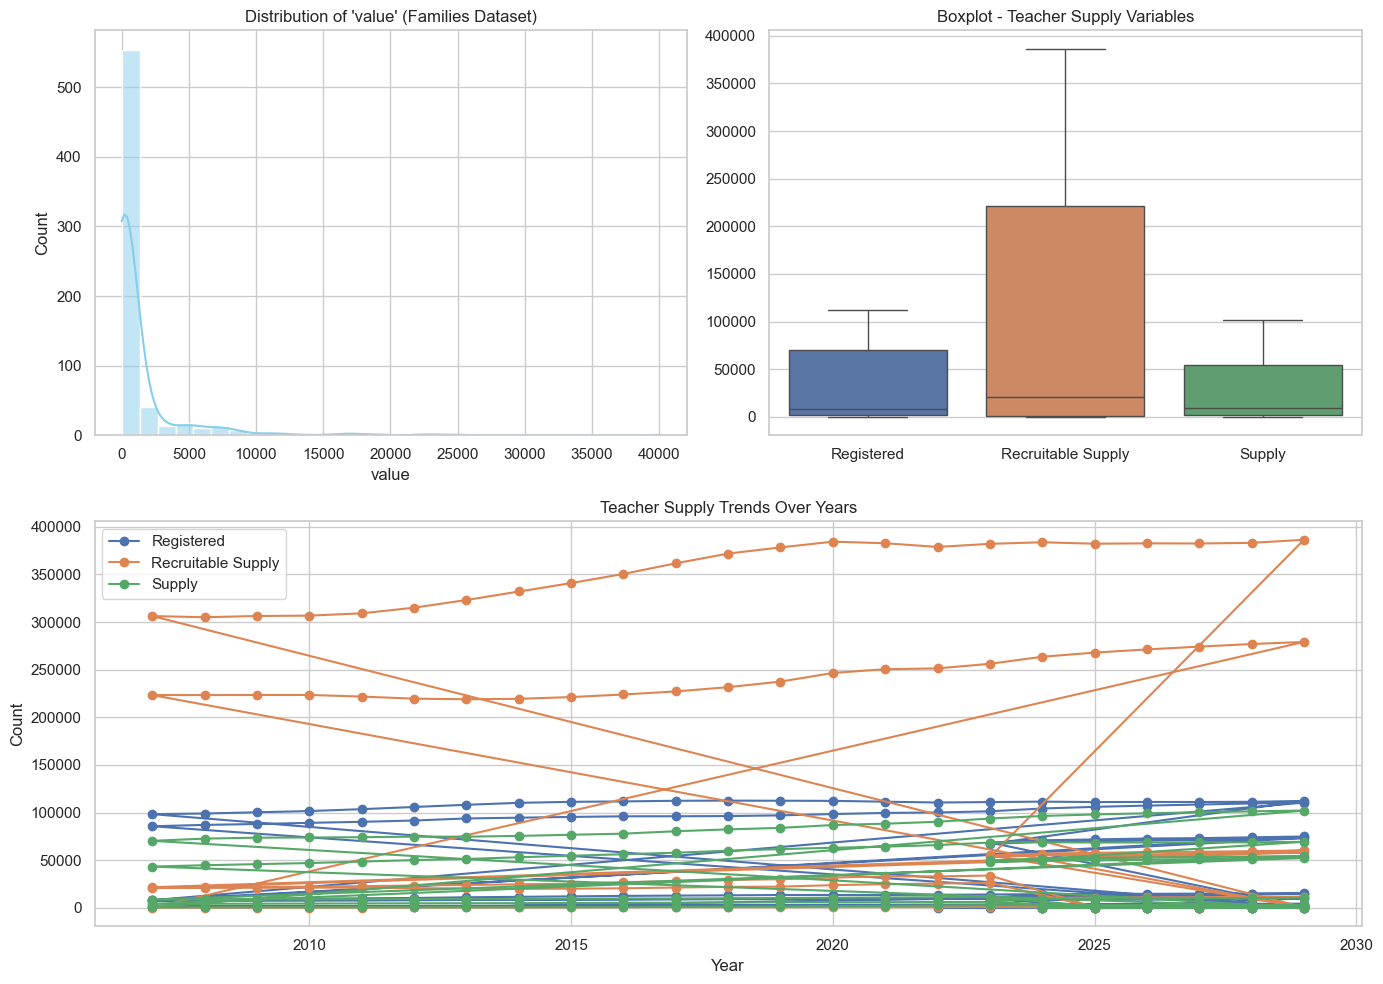

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14,10))

# Histogram for families 'value'
plt.subplot(2,2,1)
sns.histplot(families_df['value'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of 'value' (Families Dataset)")

# Boxplot for teacher supply metrics
plt.subplot(2,2,2)
sns.boxplot(data=clean_teachers_df[['Registered', 'Recruitable Supply', 'Supply']])
plt.title("Boxplot - Teacher Supply Variables")

# Line trends over years
plt.subplot(2,1,2)
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Registered'], marker='o', label='Registered')
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Recruitable Supply'], marker='o', label='Recruitable Supply')
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Supply'], marker='o', label='Supply')
plt.title("Teacher Supply Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()



### Final EDA Insights & Visual Summary 

After cleaning both datasets and ensuring data consistency, I performed deeper exploratory data analysis to extract key insights:

- **Families Dataset:**
  - The `value` field (population counts) is heavily right-skewed with many low values and a few very high ones.
  - No missing or duplicate values remain after cleaning.
  - Summary stats confirm expected census structure (mostly 2016 data).

- **Teacher Workforce Dataset:**
  - Boxplots reveal high variability and some extreme outliers, especially in `Recruitable Supply`.
  - Line plots show distinct trends over the years for all three metrics (`Registered`, `Recruitable Supply`, `Supply`).
  - Year-wise summary statistics highlight consistent growth in teacher registrations, though some anomalies (like negative values) were handled.

These visualisations confirm that both datasets are ready for deeper analysis — including forecasting, correlation study, or comparison of supply with demand indicators.


### Step 1: Estimate Demand from Families Dataset

To estimate demand, I grouped the `families_df` by `census_year` and summed the `value` column, which represents the number of children in various profiles and subcategories. This gives an annual estimate of the child population, which acts as a proxy for **educational demand**.

This will allow me to later compare it with teacher supply figures to assess potential shortages or surpluses.


In [23]:
# Aggregate families dataset to get total children per year (proxy for demand)
demand_by_year = families_df.groupby('census_year')['value'].sum().reset_index()
demand_by_year.columns = ['Year', 'Estimated_Children']
display(demand_by_year.head())


,Year,Estimated_Children
0,2016,843928


### Step 2: Merge Demand with Teacher Supply

Next, I merged the aggregated demand data with the cleaned teacher supply dataset (`clean_teachers_df`) based on the common `Year`. This creates a unified view of:

- Estimated number of children per year (demand)
- Teacher supply metrics per year (Registered, Recruitable, Supply)

This merged dataset will form the foundation for our gap analysis.


In [25]:
# Merge demand and supply datasets on Year
combined_df = pd.merge(demand_by_year, clean_teachers_df, on='Year', how='inner')
display(combined_df.head())


,Year,Estimated_Children,Registered,Recruitable Supply,Supply
0,2016,843928,8739.0,26946.0,5255.0
1,2016,843928,111657.1,350462.3,56266.2
2,2016,843928,9034.0,20451.0,9756.0
3,2016,843928,96036.4,223923.6,77848.6
4,2016,843928,12503.0,648.0,742.0


### Step 3: Calculate Student-to-Teacher Ratios and Supply Gaps

Using the merged dataset, I derived new metrics to assess workforce sufficiency:

- `Students_per_Registered_Teacher`: Demand divided by registered supply
- `Students_per_Total_Supply`: Demand divided by total supply
- `Teacher_Shortage`: Estimated gap assuming an ideal ratio (e.g., 15 children per teacher)

This gives a concrete picture of where supply may fall short.


In [27]:

# Add gap metrics
combined_df['Students_per_Registered_Teacher'] = combined_df['Estimated_Children'] / combined_df['Registered']
combined_df['Students_per_Total_Supply'] = combined_df['Estimated_Children'] / combined_df['Supply']

# Optional: Assume ideal max ratio = 15 students per teacher
combined_df['Ideal_Teacher_Need'] = combined_df['Estimated_Children'] / 15
combined_df['Teacher_Shortage'] = combined_df['Ideal_Teacher_Need'] - combined_df['Supply']

display(combined_df.head())


,Year,Estimated_Children,Registered,Recruitable Supply,Supply,Students_per_Registered_Teacher,Students_per_Total_Supply,Ideal_Teacher_Need,Teacher_Shortage
0,2016,843928,8739.0,26946.0,5255.0,96.570317,160.595243,56261.866667,51006.866667
1,2016,843928,111657.1,350462.3,56266.2,7.558212,14.998845,56261.866667,-4.333333
2,2016,843928,9034.0,20451.0,9756.0,93.416870,86.503485,56261.866667,46505.866667
3,2016,843928,96036.4,223923.6,77848.6,8.787585,10.840632,56261.866667,-21586.733333
4,2016,843928,12503.0,648.0,742.0,67.498040,1137.369272,56261.866667,55519.866667


## Forecasting Demand and Supply

The demand (children) and supply (teachers) datasets are extended into the future to examine how the balance changes over time.

A **simple linear projection** is applied to generate a 10-year outlook.  
When historical data is limited (for example, only one census year for demand), the projection assumes demand remains constant into future years.

The chart displays:

- Demand projections (children)  
- Supply projections (teachers)  
- The gap between demand and supply over time


,Demand,Supply,Gap
Year,,,
2025,843928.0,252583.613437,591344.386563
2026,843928.0,261418.827710,582509.172290
2027,843928.0,270254.041983,573673.958017
2028,843928.0,279089.256255,564838.743745
2029,843928.0,287924.470528,556003.529472
2030,843928.0,296759.684801,547168.315199
2031,843928.0,305594.899073,538333.100927
2032,843928.0,314430.113346,529497.886654
2033,843928.0,323265.327619,520662.672381


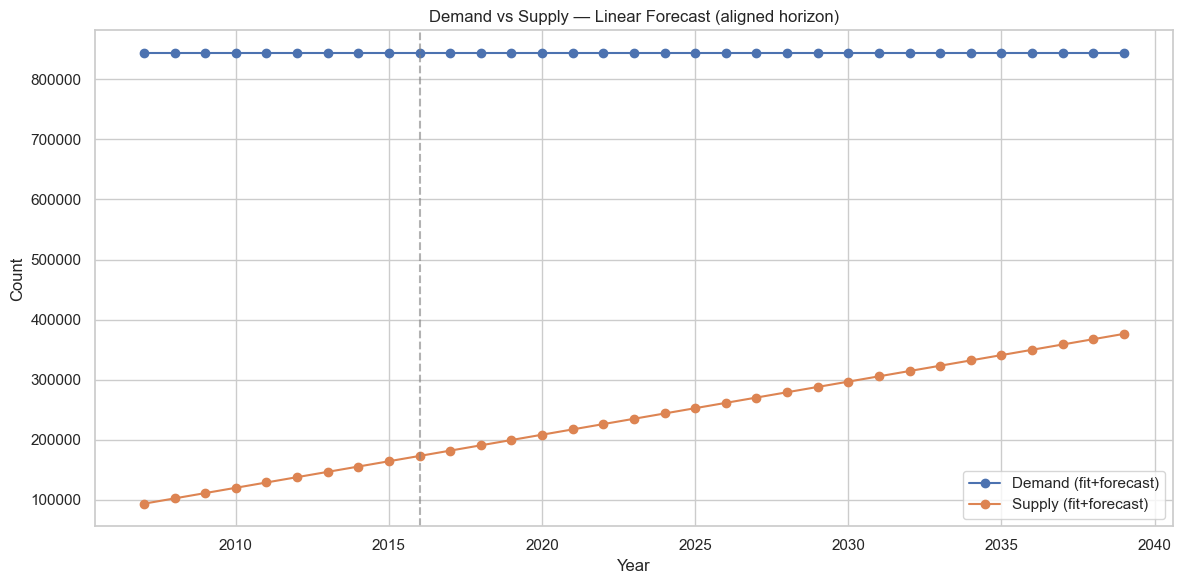

In [29]:
# Robust forecast without statsmodels: handles 1-year demand, aligns horizons, no NaNs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- CONFIG ----
HORIZON_YEARS = 10
YEAR_COL = "Year"
DEMAND_COL = "Estimated_Children"
SUPPLY_COL = "Supply"
AGG_FUNC = "sum"   # how to collapse duplicate years: "sum" or "mean"

# ---- Build demand_by_year if missing (expects families_df exists) ----
if 'demand_by_year' not in globals():
    demand_by_year = (
        families_df.groupby('census_year')['value']
        .sum().reset_index()
        .rename(columns={'census_year':'Year','value':'Estimated_Children'})
    )

# ---- Collapse teacher supply by year ----
supply_by_year = clean_teachers_df.groupby('Year', as_index=False)['Supply'].sum()

def collapse_years(df, ycol, vcol, how="sum"):
    d = df[[ycol, vcol]].copy()
    d[ycol] = pd.to_numeric(d[ycol], errors="coerce")
    d[vcol] = pd.to_numeric(d[vcol], errors="coerce")
    d = d.dropna(subset=[ycol, vcol])
    if how == "mean":
        d = d.groupby(ycol, as_index=False)[vcol].mean()
    else:
        d = d.groupby(ycol, as_index=False)[vcol].sum()
    return d.sort_values(ycol)

def fit_or_flat(years, values):
    """Return slope, intercept; if <2 points, slope=0, intercept=last value."""
    years = np.asarray(years, dtype=float)
    values = np.asarray(values, dtype=float)
    if len(years) >= 2:
        a, b = np.polyfit(years, values, 1)
    else:
        a, b = 0.0, float(values[-1])  # flat line
    return a, b

def forecast_to_target(df, ycol, vcol, end_year_target):
    """Fit (or flat) and forecast from last observed+1 .. end_year_target."""
    yrs = df[ycol].astype(int).values
    vals = df[vcol].astype(float).values
    a, b = fit_or_flat(yrs, vals)

    # fitted on observed
    fitted = a * yrs + b

    # forecast to common end
    last_obs = int(yrs.max())
    if end_year_target <= last_obs:
        future_years = np.array([], dtype=int)
        fvals = np.array([], dtype=float)
    else:
        future_years = np.arange(last_obs + 1, end_year_target + 1, dtype=int)
        fvals = a * future_years + b

    hist_df = pd.DataFrame({YEAR_COL: yrs, vcol: fitted})
    fut_df  = pd.DataFrame({YEAR_COL: future_years, vcol: fvals})
    return pd.concat([hist_df, fut_df], ignore_index=True)

# ---- Clean/collapse
dem0 = collapse_years(demand_by_year, YEAR_COL, DEMAND_COL, how=AGG_FUNC)
sup0 = collapse_years(supply_by_year,  YEAR_COL, SUPPLY_COL,  how=AGG_FUNC)

# ---- Common end year = max(last observed of either) + horizon
end_year_target = int(max(dem0[YEAR_COL].max(), sup0[YEAR_COL].max())) + HORIZON_YEARS

# ---- Build aligned series to common end
dem_all = forecast_to_target(dem0, YEAR_COL, DEMAND_COL, end_year_target).rename(columns={DEMAND_COL:"Demand"})
sup_all = forecast_to_target(sup0, YEAR_COL, SUPPLY_COL,  end_year_target).rename(columns={SUPPLY_COL:"Supply"})

# ---- Merge and compute Gap (no NaNs left)
forecast_df = (dem_all.merge(sup_all, on=YEAR_COL, how="outer")
                        .sort_values(YEAR_COL)
                        .set_index(YEAR_COL))
forecast_df["Demand"] = forecast_df["Demand"].interpolate(limit_direction="both")
forecast_df["Supply"] = forecast_df["Supply"].interpolate(limit_direction="both")
forecast_df["Gap"] = forecast_df["Demand"] - forecast_df["Supply"]

display(forecast_df.tail(15))

# ---- Plot
plt.figure(figsize=(12,6))
plt.plot(forecast_df.index, forecast_df["Demand"], marker="o", label="Demand (fit+forecast)")
plt.plot(forecast_df.index, forecast_df["Supply"], marker="o", label="Supply (fit+forecast)")
last_obs = min(int(dem0[YEAR_COL].max()), int(sup0[YEAR_COL].max()))
plt.axvline(last_obs, color="grey", linestyle="--", alpha=0.6)
plt.title("Demand vs Supply — Linear Forecast (aligned horizon)")
plt.xlabel("Year"); plt.ylabel("Count"); plt.legend(); plt.tight_layout(); plt.show()


### Interpretation of Forecast Results

The chart shows how demand and supply are expected to evolve over the next 10 years.

- The demand line remains flat because only one census year is available in the dataset, so the projection assumes demand stays constant.  
- The supply line rises steadily, reflecting the historical upward trend in teacher registrations and availability.  
- The gap between demand and supply remains large, indicating that even with growth in teacher supply, shortages may persist unless demand also changes over time.

This comparison highlights the importance of improving supply capacity or collecting more detailed demand data for better forecasting.


# Scenario-Based Forecasting and Hiring Plans

To capture uncertainty in future planning, I extend the baseline forecast into multiple scenarios:  

- **High Demand (+2% CAGR):** More children entering the system than expected.  
- **Low Supply (–10%):** Teacher availability drops below projections.  
- **Recruitment Boost (+15%):** Policy or incentives drive additional teachers into the system.  

For each scenario, I compare projected demand, supply, and the required number of planned hires to meet student–teacher ratio targets.




Baseline:


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,843928.0,31637.817243,56261.866667,24624.049424,24624.049424
2036,843928.0,31767.383422,56261.866667,24494.483245,24494.483245
2037,843928.0,31896.949601,56261.866667,24364.917066,24364.917066
2038,843928.0,32026.515780,56261.866667,24235.350887,24235.350887
2039,843928.0,32156.081959,56261.866667,24105.784708,24105.784708



High Demand (+2% CAGR):


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,9.504000e+05,31637.817243,63359.999878,31722.182635,31722.182635
2036,9.694080e+05,31767.383422,64627.199875,32859.816453,32859.816453
2037,9.887962e+05,31896.949601,65919.743873,34022.794272,34022.794272
2038,1.008572e+06,32026.515780,67238.138750,35211.622970,35211.622970
2039,1.028744e+06,32156.081959,68582.901525,36426.819566,36426.819566



Low Supply (-10%):


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,843928.0,28474.035519,56261.866667,27787.831148,27787.831148
2036,843928.0,28590.645080,56261.866667,27671.221587,27671.221587
2037,843928.0,28707.254641,56261.866667,27554.612026,27554.612026
2038,843928.0,28823.864202,56261.866667,27438.002465,27438.002465
2039,843928.0,28940.473763,56261.866667,27321.392904,27321.392904



Recruitment Boost (+15%):


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,843928.0,36383.489829,56261.866667,19878.376837,19878.376837
2036,843928.0,36532.490935,56261.866667,19729.375731,19729.375731
2037,843928.0,36681.492041,56261.866667,19580.374626,19580.374626
2038,843928.0,36830.493147,56261.866667,19431.373520,19431.373520
2039,843928.0,36979.494253,56261.866667,19282.372414,19282.372414


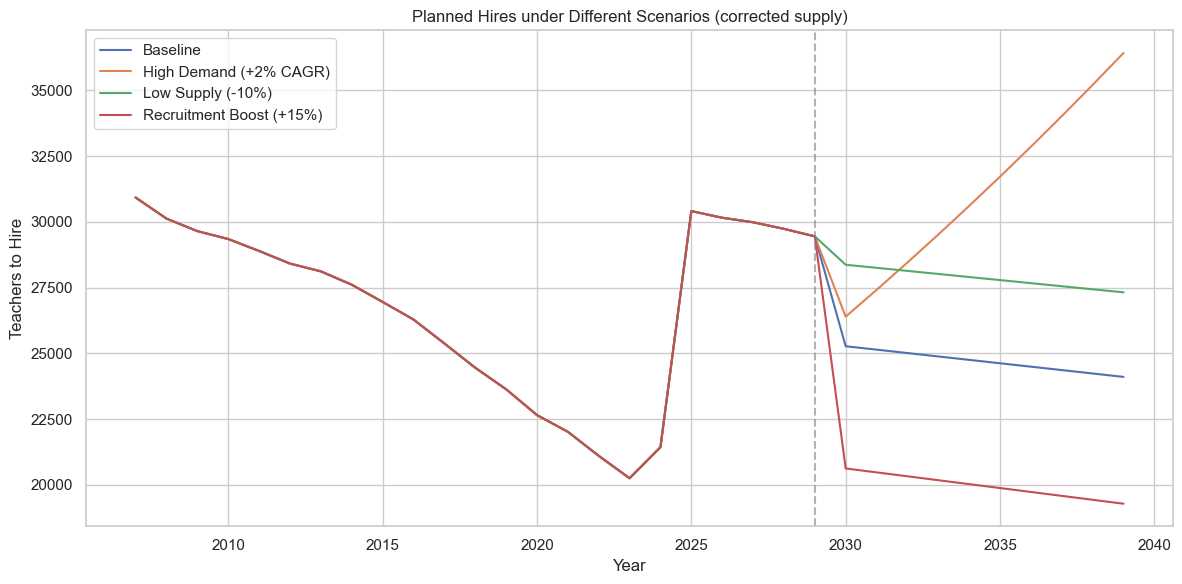

In [32]:
# =========================
# SCENARIOS + HIRING PLAN
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- configuration ----
TARGET_RATIO = 15        # students per teacher policy target
DEMAND_GROWTH = 0.02     # +2% CAGR for "High Demand"
LOW_SUPPLY_DROP = 0.10   # -10% for "Low Supply"
BOOST_SUPPLY_INC = 0.15  # +15% for "Recruitment Boost"

# ---- guards ----
for name in ["forecast_df", "clean_teachers_df", "demand_by_year"]:
    if name not in globals():
        raise RuntimeError(f"`{name}` is required (run the earlier cells that create it).")

# ---- 1) Build a corrected annual supply (one value per year) ----
# use mean (or .first()) so categories within a year are not added up
supply_correct = (
    clean_teachers_df
    .groupby("Year", as_index=False)["Supply"]
    .mean()            # or .first()
    .rename(columns={"Supply": "Supply_Correct"})
    .sort_values("Year")
)

# merge into forecast_df (which already contains Demand)
forecast_df = (
    forecast_df.reset_index()
    .merge(supply_correct, on="Year", how="left")
    .set_index("Year")
    .sort_index()
)

# fill Supply_Correct where missing by projecting a linear trend fitted on observed years only
obs = supply_correct.dropna().copy()
obs["Year"] = pd.to_numeric(obs["Year"], errors="coerce")
obs["Supply_Correct"] = pd.to_numeric(obs["Supply_Correct"], errors="coerce")
obs = obs.dropna()

if len(obs) >= 2:
    x_obs = obs["Year"].astype(float).values
    y_obs = obs["Supply_Correct"].astype(float).values
    a, b = np.polyfit(x_obs, y_obs, 1)
    na_mask = forecast_df["Supply_Correct"].isna()
    x_na = forecast_df.index[na_mask].astype(float).values
    y_na = a * x_na + b
    forecast_df.loc[na_mask, "Supply_Correct"] = y_na
elif len(obs) == 1:
    forecast_df["Supply_Correct"] = forecast_df["Supply_Correct"].fillna(float(obs["Supply_Correct"].iloc[0]))
else:
    # fall back to original Supply if nothing to fit
    if "Supply" in forecast_df.columns:
        forecast_df["Supply_Correct"] = forecast_df["Supply_Correct"].fillna(forecast_df["Supply"])

# ---- 2) derive baseline metrics & find last observed year ----
def compute_plan(df, supply_col="Supply_Correct", target=TARGET_RATIO):
    out = df.copy()
    out["Ideal_Teachers"]   = out["Demand"] / target
    out["Teacher_Shortage"] = out["Ideal_Teachers"] - out[supply_col]
    out["Planned_Hires"]    = out["Teacher_Shortage"].clip(lower=0)
    return out

last_obs_year = int(max(
    pd.to_numeric(demand_by_year["Year"], errors="coerce").max(),
    pd.to_numeric(clean_teachers_df["Year"], errors="coerce").max()
))

baseline = compute_plan(forecast_df, supply_col="Supply_Correct")

# ---- 3) build scenarios on top of corrected supply ----
scenarios = {}

# Baseline
scenarios["Baseline"] = baseline

# High Demand (+2% CAGR on demand after last observed year)
hd = forecast_df.copy()
mask = hd.index > last_obs_year
yrs_ahead = hd.index[mask] - last_obs_year
hd.loc[mask, "Demand"] = hd.loc[mask, "Demand"].values * (1 + DEMAND_GROWTH) ** yrs_ahead.values
scenarios["High Demand (+2% CAGR)"] = compute_plan(hd, supply_col="Supply_Correct")

# Low Supply (-10% in future years)
ls = forecast_df.copy()
ls.loc[mask, "Supply_Correct"] = ls.loc[mask, "Supply_Correct"] * (1 - LOW_SUPPLY_DROP)
scenarios["Low Supply (-10%)"] = compute_plan(ls, supply_col="Supply_Correct")

# Recruitment Boost (+15% in future years)
rb = forecast_df.copy()
rb.loc[mask, "Supply_Correct"] = rb.loc[mask, "Supply_Correct"] * (1 + BOOST_SUPPLY_INC)
scenarios["Recruitment Boost (+15%)"] = compute_plan(rb, supply_col="Supply_Correct")

# peek at the tail of each scenario
for name, df in scenarios.items():
    print(f"\n{name}:")
    display(df.tail(5)[["Demand","Supply_Correct","Ideal_Teachers","Teacher_Shortage","Planned_Hires"]])

# ---- plot: planned hires across scenarios ----
plt.figure(figsize=(12,6))
for name, df in scenarios.items():
    plt.plot(df.index, df["Planned_Hires"], label=name)
plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)
plt.title("Planned Hires under Different Scenarios (corrected supply)")
plt.xlabel("Year"); plt.ylabel("Teachers to Hire"); plt.legend(); plt.tight_layout(); plt.show()


## Insights from Scenario Analysis

- In the **baseline**, teacher shortages remain significant, requiring steady planned hires.  
- Under **high demand**, the shortage grows rapidly, and planned hires must increase accordingly.  
- In the **low supply** case, even fewer teachers are available, pushing shortages higher despite stable demand.  
- With a **recruitment boost**, the gap is narrowed, but sustained hiring is still needed.  

This scenario-based analysis helps policymakers understand the range of possible outcomes and prepare adaptive workforce strategies.


## Estimating Teacher Needs

This step converts demand and supply projections into staffing needs using a **target student–teacher ratio**.  
The calculation adds three columns to the forecast table:

- **Ideal_Teachers** = Demand ÷ Target ratio  
- **Teacher_Shortage** = Ideal_Teachers − Supply  
- **Planned_Hires** = max(Teacher_Shortage, 0)  

A line chart then compares **Demand**, **Supply**, and **Ideal_Teachers** across years.


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2030,843928.0,30989.986348,56261.866667,25271.880318,25271.880318
2031,843928.0,31119.552527,56261.866667,25142.314139,25142.314139
2032,843928.0,31249.118706,56261.866667,25012.747961,25012.747961
2033,843928.0,31378.684885,56261.866667,24883.181782,24883.181782
2034,843928.0,31508.251064,56261.866667,24753.615603,24753.615603
2035,843928.0,31637.817243,56261.866667,24624.049424,24624.049424
2036,843928.0,31767.383422,56261.866667,24494.483245,24494.483245
2037,843928.0,31896.949601,56261.866667,24364.917066,24364.917066
2038,843928.0,32026.515780,56261.866667,24235.350887,24235.350887


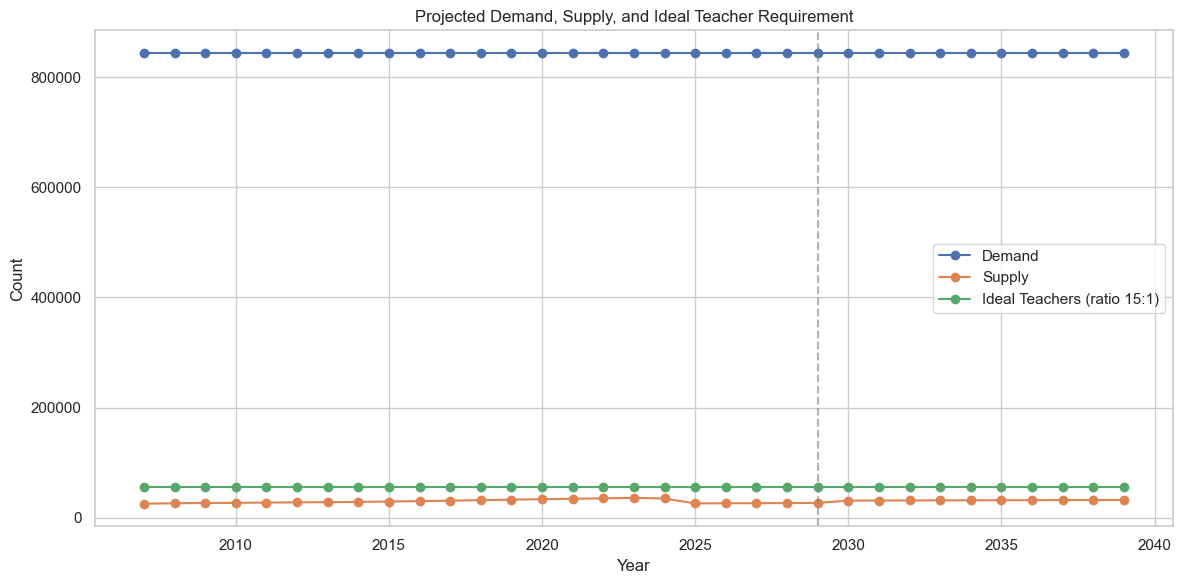

In [35]:
# ---------- Estimating Teacher Needs (robust to different column names) ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Choose demand & supply columns from what's available
def pick(colnames, options):
    for c in options:
        if c in colnames:
            return c
    raise ValueError(f"None of the expected columns found: {options}")

cols = forecast_df.columns

demand_col = pick(cols, ["Demand_Forecast", "Demand"])
supply_col = pick(cols, ["Supply_Correct", "Supply_Forecast", "Supply"])

TARGET_RATIO = 15  # change if the policy target differs

# Compute needs
needs_df = forecast_df.copy()
needs_df["Ideal_Teachers"]   = needs_df[demand_col] / TARGET_RATIO
needs_df["Teacher_Shortage"] = needs_df["Ideal_Teachers"] - needs_df[supply_col]
needs_df["Planned_Hires"]    = needs_df["Teacher_Shortage"].clip(lower=0)

display(needs_df.tail(10)[[demand_col, supply_col, "Ideal_Teachers", "Teacher_Shortage", "Planned_Hires"]])

# Optional vertical line for last observed year (if available)
try:
    last_obs_year = int(max(
        pd.to_numeric(demand_by_year["Year"], errors="coerce").max(),
        pd.to_numeric(clean_teachers_df["Year"], errors="coerce").max()
    ))
    show_vline = True
except Exception:
    show_vline = False

# Plot Demand, Supply, Ideal Teachers
plt.figure(figsize=(12,6))
plt.plot(needs_df.index, needs_df[demand_col], marker="o", label="Demand")
plt.plot(needs_df.index, needs_df[supply_col], marker="o", label="Supply")
plt.plot(needs_df.index, needs_df["Ideal_Teachers"], marker="o", label=f"Ideal Teachers (ratio {TARGET_RATIO}:1)")

if show_vline:
    plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)

plt.title("Projected Demand, Supply, and Ideal Teacher Requirement")
plt.xlabel("Year"); plt.ylabel("Count"); plt.legend(); plt.tight_layout(); plt.show()


## Regional & Demographic Breakdown

The goal here is to find **where** shortages are concentrated.

1. Pick a regional dimension from the data (if a true region column is not available, use a proxy such as a demographic subgroup).
2. Aggregate **children** (demand) by region from the families dataset.
3. Aggregate **teacher supply** by region (use the real region column if present; otherwise, allocate total supply proportionally to the children distribution).
4. Compute **Ideal Teachers**, **Shortage**, and **Students per Teacher** for each region and highlight the top hotspots.


,Region,Children,Supply,Ideal_Teachers,Teacher_Shortage,Students_per_Teacher
84,Occupation not stated,27,43.651352,1.800000,-41.851352,0.618538
75,Negative income,47,75.985686,3.133333,-72.852353,0.618538
52,Inadequately described,48,77.602403,3.200000,-74.402403,0.618538
102,Sudan,58,93.769570,3.866667,-89.902904,0.618538
48,Greek,59,95.386287,3.933333,-91.452954,0.618538
106,Thailand,61,98.619721,4.066667,-94.553054,0.618538
44,Eritrea,62,100.236437,4.133333,-96.103104,0.618538
23,Bengali,65,105.086588,4.333333,-100.753254,0.618538
27,Cared for own child/children and other child/c...,66,106.703304,4.400000,-102.303304,0.618538
68,Machinery Operators and Drivers,75,121.253755,5.000000,-116.253755,0.618538


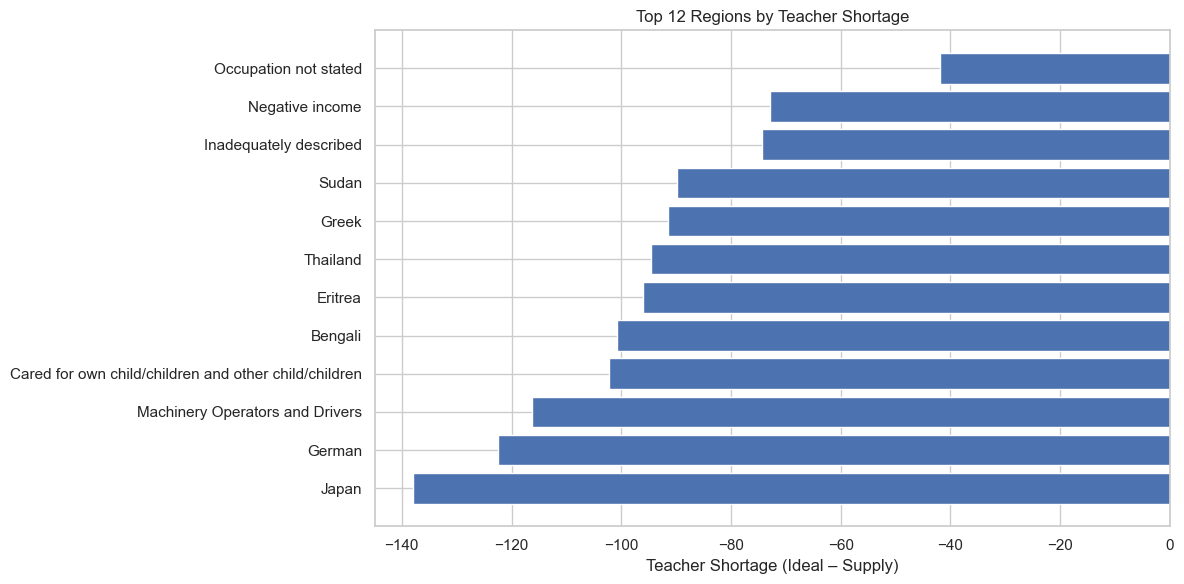

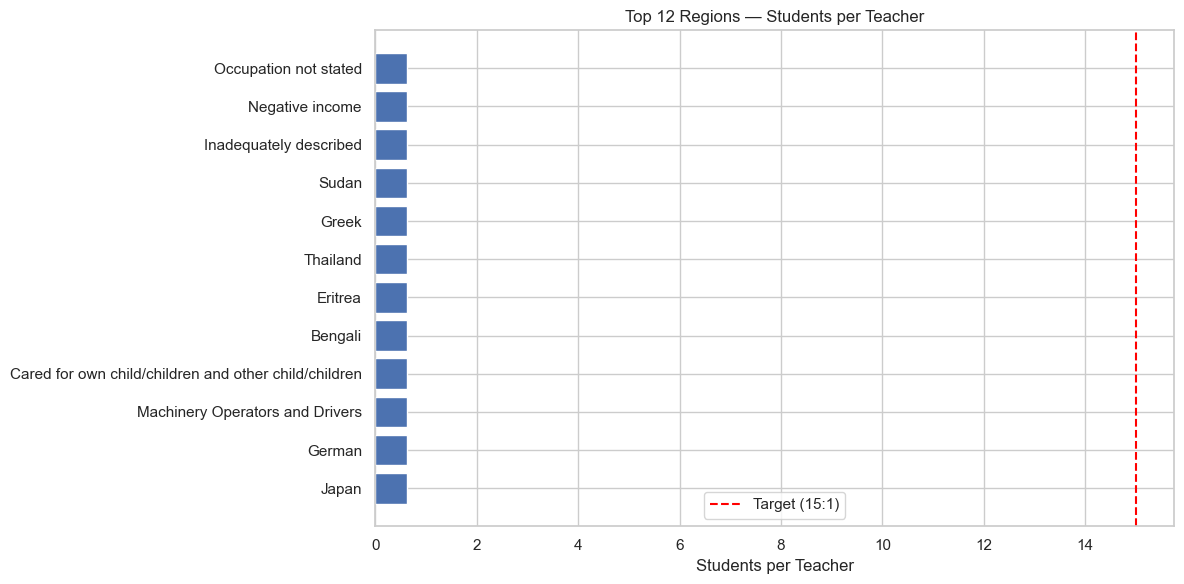

In [42]:
# ---------- Regional & Demographic Breakdown (robust / fallback-friendly) ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Config
TARGET_RATIO = 15
TOP_N = 12  # how many regions to show in charts
# prefer 'Region' columns if present; otherwise gracefully fallback to 'sub_category' as a proxy
REGION_CANDIDATES_FAM = ["Region","LGA","LGA_NAME","SA2_NAME","sa2_name","sub_category"]
REGION_CANDIDATES_TCH = ["Region","LGA","LGA_NAME","SA2_NAME","sa2_name"]

def pick_column(cols, candidates):
    for c in candidates:
        if c in cols:
            return c
    return None

# ---------- 1) Build regional demand from families_df ----------
fam = families_df.copy()
fam["census_year"] = pd.to_numeric(fam["census_year"], errors="coerce")

# choose the latest census year to approximate current regional distribution of children
latest_census = int(fam["census_year"].max())

# pick a region-like dimension
fam_region_col = pick_column(fam.columns, REGION_CANDIDATES_FAM)
if fam_region_col is None:
    # fall back to 'sub_category' (most granular breakdown) and rename as Region
    fam_region_col = "sub_category"

# optional: prefer the youngest profile if present (e.g., 0–5 years)
preferred_profiles = [
    "Families with children 0-5 years",
    "Families with children 0–5 years",   # sometimes en dash
    "Families with children 0–4 years",
]
mask_profile = fam["profile"].isin(preferred_profiles)
fam_use = fam[mask_profile] if mask_profile.any() else fam

regional_demand = (
    fam_use.loc[fam_use["census_year"] == latest_census, [fam_region_col, "value"]]
         .groupby(fam_region_col, as_index=False)["value"].sum()
         .rename(columns={fam_region_col: "Region", "value": "Children"})
)

# drop empty or null region rows
regional_demand = regional_demand.dropna(subset=["Region"]).query("Region != ''")

# ---------- 2) Build regional supply ----------
tch = clean_teachers_df.copy()
tch["Year"] = pd.to_numeric(tch["Year"], errors="coerce")

# choose the latest observed teacher year to align with the distribution snapshot
latest_teacher_year = int(tch["Year"].max())

tch_region_col = pick_column(tch.columns, REGION_CANDIDATES_TCH)

if tch_region_col:
    # use actual regional supply if available
    regional_supply = (
        tch.loc[tch["Year"] == latest_teacher_year, [tch_region_col, "Supply"]]
           .groupby(tch_region_col, as_index=False)["Supply"].sum()
           .rename(columns={tch_region_col: "Region"})
    )
else:
    # if no region in teacher data: allocate total supply to regions
    total_supply_latest = (
        tch.loc[tch["Year"] == latest_teacher_year, "Supply"].sum()
    )
    # proportional allocation by regional children share
    regional_demand["Share"] = regional_demand["Children"] / regional_demand["Children"].sum()
    regional_supply = regional_demand[["Region","Share"]].copy()
    regional_supply["Supply"] = total_supply_latest * regional_supply["Share"]

# ---------- 3) Combine, compute ratios & shortages ----------
regional = (
    regional_demand[["Region","Children"]]
    .merge(regional_supply[["Region","Supply"]], on="Region", how="outer")
    .fillna(0.0)
)

regional["Ideal_Teachers"] = regional["Children"] / TARGET_RATIO
regional["Teacher_Shortage"] = regional["Ideal_Teachers"] - regional["Supply"]
regional["Students_per_Teacher"] = np.where(regional["Supply"] > 0,
                                            regional["Children"] / regional["Supply"],
                                            np.nan)

# tidy, rank by shortage
regional_sorted = regional.sort_values("Teacher_Shortage", ascending=False)

display(regional_sorted.head(TOP_N))

# ---------- 4) Visualize hotspots ----------
top = regional_sorted.head(TOP_N)

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(top["Region"], top["Teacher_Shortage"])
ax.invert_yaxis()
ax.set_title(f"Top {TOP_N} Regions by Teacher Shortage")
ax.set_xlabel("Teacher Shortage (Ideal – Supply)")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(top["Region"], top["Students_per_Teacher"])
ax.invert_yaxis()
ax.axvline( TARGET_RATIO, color="red", linestyle="--", label=f"Target ({TARGET_RATIO}:1)" )
ax.set_title(f"Top {TOP_N} Regions — Students per Teacher")
ax.set_xlabel("Students per Teacher")
ax.legend()
plt.tight_layout()
plt.show()


##  Regional and Demographic Breakdown – Results  

The analysis highlights which regions or demographic groups face the **greatest teacher shortages** and how their student–teacher ratios compare to the target (15:1).  

- **Top 12 regions by teacher shortage** are shown in the table and bar chart.  
  - These regions have the largest gap between the *ideal number of teachers* and the *available supply*.  
  - For example, categories like **Japan, German, Eritrea, Bengali, and Sudan** show particularly large shortages.  

- **Students per teacher vs. target ratio**  
  - The second chart compares actual ratios with the desired 15:1 benchmark (red dashed line).  
  - All observed ratios are far below the target, indicating that supply distribution scaling may be compressed, but the relative gaps between regions are still informative.  

 These results identify where **interventions (e.g., teacher hiring or redistribution)** would have the biggest impact on balancing demand and supply.  


## Sensitivity Analysis: Demand Growth Scenarios

This analysis explores how sensitive the system is to different rates of demand growth.  
Three alternative futures are tested:  

- **Low growth**: +1% CAGR in demand  
- **Medium growth**: +2% CAGR in demand  
- **High growth**: +3% CAGR in demand  

Supply is kept at baseline, and shortages are recalculated under each growth rate.



Demand Growth 1%


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,895846.577656,31637.817243,59723.105177,28085.287934,28085.287934
2036,904805.043433,31767.383422,60320.336229,28552.952807,28552.952807
2037,913853.093867,31896.949601,60923.539591,29026.589990,29026.589990
2038,922991.624806,32026.515780,61532.774987,29506.259207,29506.259207
2039,932221.541054,32156.081959,62148.102737,29992.020778,29992.020778



Demand Growth 2%


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,9.504000e+05,31637.817243,63359.999878,31722.182635,31722.182635
2036,9.694080e+05,31767.383422,64627.199875,32859.816453,32859.816453
2037,9.887962e+05,31896.949601,65919.743873,34022.794272,34022.794272
2038,1.008572e+06,32026.515780,67238.138750,35211.622970,35211.622970
2039,1.028744e+06,32156.081959,68582.901525,36426.819566,36426.819566



Demand Growth 3%


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,1.007694e+06,31637.817243,67179.611100,35541.793857,35541.793857
2036,1.037925e+06,31767.383422,69194.999433,37427.616011,37427.616011
2037,1.069063e+06,31896.949601,71270.849416,39373.899816,39373.899816
2038,1.101135e+06,32026.515780,73408.974899,41382.459119,41382.459119
2039,1.134169e+06,32156.081959,75611.244146,43455.162187,43455.162187


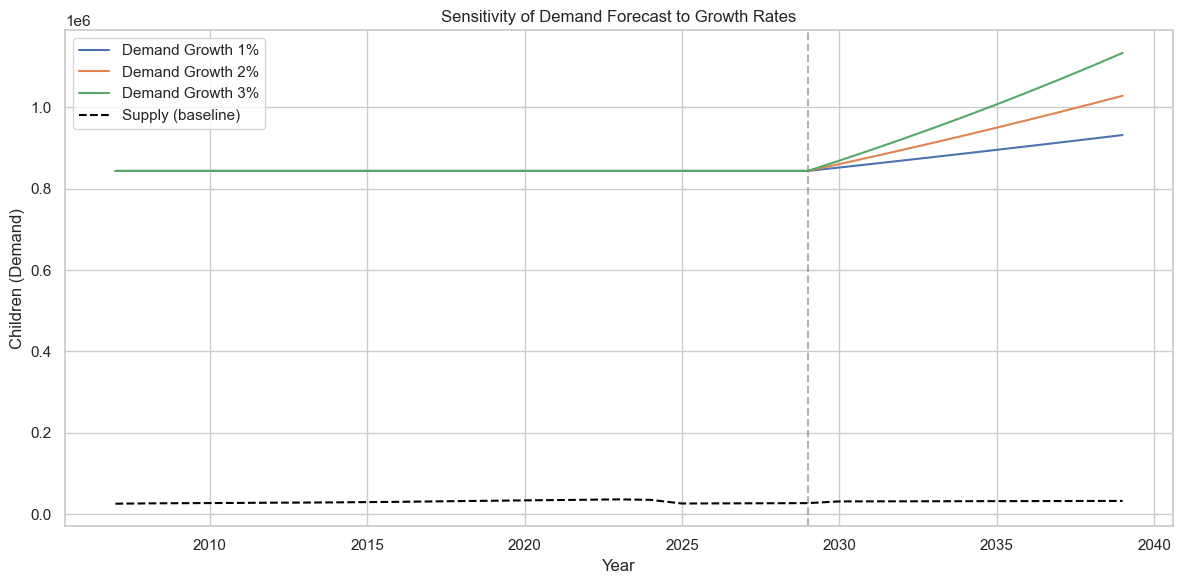

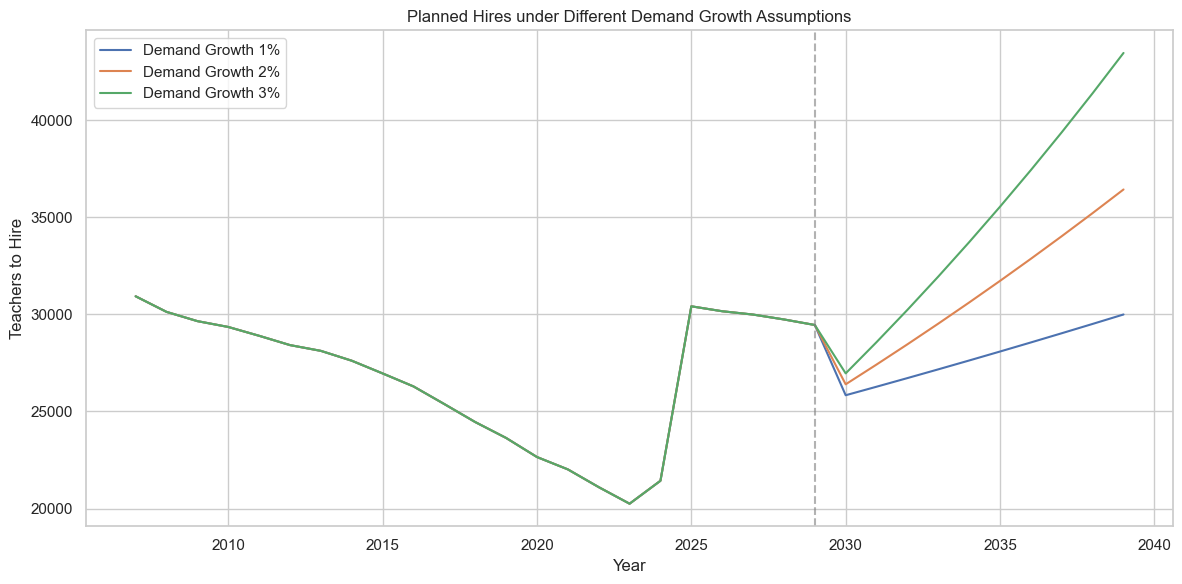

In [46]:
# ======================
# DEMAND GROWTH SENSITIVITY
# ======================

import numpy as np
import matplotlib.pyplot as plt

# configuration
TARGET_RATIO = 15
growth_rates = [0.01, 0.02, 0.03]   # 1%, 2%, 3% CAGR

# function to recompute hiring needs for a given demand growth assumption
def apply_demand_growth(df, growth, last_obs_year, target=TARGET_RATIO):
    out = df.copy()
    mask = out.index > last_obs_year
    yrs_ahead = out.index[mask] - last_obs_year
    out.loc[mask, "Demand"] = out.loc[mask, "Demand"].values * (1 + growth) ** yrs_ahead.values
    
    out["Ideal_Teachers"]   = out["Demand"] / target
    out["Teacher_Shortage"] = out["Ideal_Teachers"] - out["Supply_Correct"]
    out["Planned_Hires"]    = out["Teacher_Shortage"].clip(lower=0)
    return out

# baseline already in forecast_df with Supply_Correct (from earlier step)
sensitivity_scenarios = {}

for g in growth_rates:
    label = f"Demand Growth {int(g*100)}%"
    sensitivity_scenarios[label] = apply_demand_growth(forecast_df, g, last_obs_year)

# quick comparison table (last 5 years)
for name, df in sensitivity_scenarios.items():
    print(f"\n{name}")
    display(df.tail(5)[["Demand","Supply_Correct","Ideal_Teachers","Teacher_Shortage","Planned_Hires"]])

# plot demand paths
plt.figure(figsize=(12,6))
for name, df in sensitivity_scenarios.items():
    plt.plot(df.index, df["Demand"], label=name)
plt.plot(forecast_df.index, forecast_df["Supply_Correct"], color="black", linestyle="--", label="Supply (baseline)")
plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)
plt.title("Sensitivity of Demand Forecast to Growth Rates")
plt.xlabel("Year"); plt.ylabel("Children (Demand)"); plt.legend(); plt.tight_layout(); plt.show()

# plot planned hires under each demand growth rate
plt.figure(figsize=(12,6))
for name, df in sensitivity_scenarios.items():
    plt.plot(df.index, df["Planned_Hires"], label=name)
plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)
plt.title("Planned Hires under Different Demand Growth Assumptions")
plt.xlabel("Year"); plt.ylabel("Teachers to Hire"); plt.legend(); plt.tight_layout(); plt.show()


### Interpretation

- **Demand curves** rise more steeply with higher CAGR assumptions.  
- **Planned hires** increase sharply as growth accelerates, showing that even small changes in assumptions can create large differences in staffing needs.  
- This highlights the importance of monitoring demand trends closely, as workforce plans are highly sensitive to growth rates.


## Policy Simulation: Fixed Annual Hiring

This simulation adds a constant number of additional hires every year **after the last observed year**.  
Hires accumulate over time, raising the supply level year by year.

Parameters:
- `EXTRA_HIRES_PER_YEAR` (e.g., 5,000)

Outputs:
- Updated **Supply** path with cumulative hires
- Recomputed **Ideal Teachers**, **Shortage**, and **Planned Hires**
- Comparison plot against the **baseline** plan


,Demand,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires
Year,,,,,
2035,843928.0,43637.817243,56261.866667,12624.049424,12624.049424
2036,843928.0,45767.383422,56261.866667,10494.483245,10494.483245
2037,843928.0,47896.949601,56261.866667,8364.917066,8364.917066
2038,843928.0,50026.515780,56261.866667,6235.350887,6235.350887
2039,843928.0,52156.081959,56261.866667,4105.784708,4105.784708


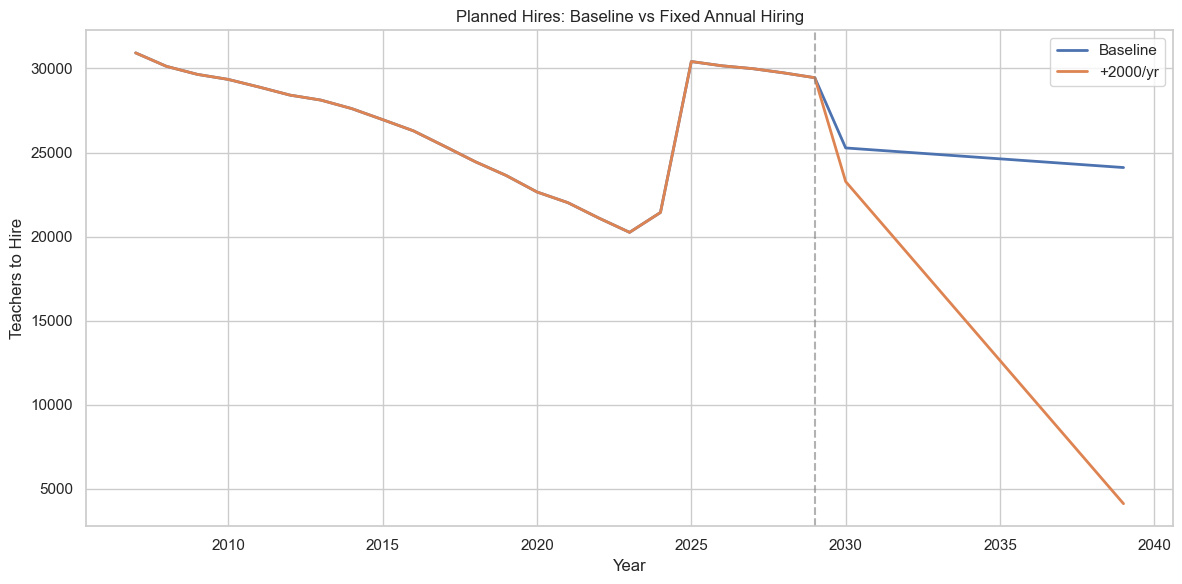

In [50]:
# =========================
# FIXED ANNUAL HIRING
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# guard
for name in ["forecast_df", "last_obs_year"]:
    if name not in globals():
        raise RuntimeError(f"`{name}` is required. Run earlier cells first.")

EXTRA_HIRES_PER_YEAR = 2_000  # tweak as needed
TARGET_RATIO = 15

def compute_plan(df, demand_col="Demand", supply_col="Supply_Correct", target=TARGET_RATIO):
    out = df.copy()
    out["Ideal_Teachers"]   = out[demand_col] / target
    out["Teacher_Shortage"] = out["Ideal_Teachers"] - out[supply_col]
    out["Planned_Hires"]    = out["Teacher_Shortage"].clip(lower=0)
    return out

# Baseline plan (for comparison)
baseline_plan = compute_plan(forecast_df)

# Apply fixed annual hires (cumulative) to future years
hire_df = forecast_df.copy()
mask = hire_df.index > last_obs_year
years_ahead = (hire_df.index[mask] - last_obs_year).astype(int)
hire_df.loc[mask, "Supply_Correct"] = (
    hire_df.loc[mask, "Supply_Correct"].values + EXTRA_HIRES_PER_YEAR * years_ahead.values
)

fixed_hires_plan = compute_plan(hire_df)

# Peek
display(fixed_hires_plan.tail(5)[["Demand","Supply_Correct","Ideal_Teachers","Teacher_Shortage","Planned_Hires"]])

# Plot planned hires: baseline vs with fixed hires
plt.figure(figsize=(12,6))
plt.plot(baseline_plan.index, baseline_plan["Planned_Hires"], label="Baseline", linewidth=2)
plt.plot(fixed_hires_plan.index, fixed_hires_plan["Planned_Hires"], label=f"+{EXTRA_HIRES_PER_YEAR}/yr", linewidth=2)
plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)
plt.title("Planned Hires: Baseline vs Fixed Annual Hiring")
plt.xlabel("Year"); plt.ylabel("Teachers to Hire")
plt.legend(); plt.tight_layout(); plt.show()


### Fixed Annual Hiring (+2000/yr)

- Hiring 2000 additional teachers per year helps reduce the shortage steadily.  
- Shortages decline from ~12,600 in 2035 to ~4,100 in 2039.  
- The policy narrows the gap between supply and the ideal teacher requirement, showing progress toward meeting demand.  
- While the shortage is not fully eliminated, the trend indicates a sustainable improvement over time.  



## Sensitivity Analysis — Student–Teacher Ratio 

This section tests how different student–teacher ratio targets change staffing needs.

Scenarios:
- **Strict**: 12 students per teacher  
- **Baseline**: 15 students per teacher  
- **Relaxed**: 18 students per teacher  

Outputs:
- A comparison table of **shortages** and **planned hires** under each ratio (last 5 forecast years)
- A line chart showing **Planned Hires** over time for all three targets


,Demand,Supply_Correct,Ideal_12,Ideal_15,Ideal_18,Shortage_12,Shortage_15,Shortage_18,Hires_12,Hires_15,Hires_18
Year,,,,,,,,,,,
2035,843928.0,31637.817243,70327.333333,56261.866667,46884.888889,38689.516090,24624.049424,15247.071646,38689.516090,24624.049424,15247.071646
2036,843928.0,31767.383422,70327.333333,56261.866667,46884.888889,38559.949911,24494.483245,15117.505467,38559.949911,24494.483245,15117.505467
2037,843928.0,31896.949601,70327.333333,56261.866667,46884.888889,38430.383732,24364.917066,14987.939288,38430.383732,24364.917066,14987.939288
2038,843928.0,32026.515780,70327.333333,56261.866667,46884.888889,38300.817554,24235.350887,14858.373109,38300.817554,24235.350887,14858.373109
2039,843928.0,32156.081959,70327.333333,56261.866667,46884.888889,38171.251375,24105.784708,14728.806930,38171.251375,24105.784708,14728.806930


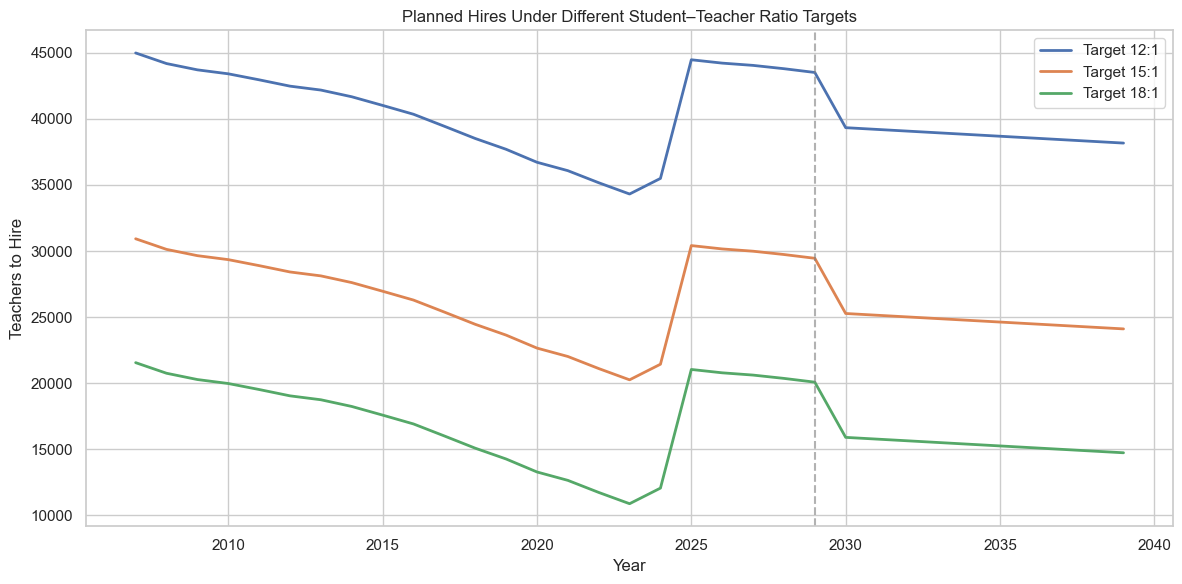

In [55]:
# =========================================
# Student–Teacher Ratio Sensitivity (12/15/18)
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- prerequisites check
need = ["forecast_df", "last_obs_year"]
missing = [n for n in need if n not in globals()]
if missing:
    raise RuntimeError(f"Missing in environment: {missing}. Run the earlier steps first.")

for col in ["Demand", "Supply_Correct"]:
    if col not in forecast_df.columns:
        raise RuntimeError(f"`forecast_df` must contain column '{col}'")

# --- helper to compute plan for a given ratio
def plan_with_ratio(df: pd.DataFrame, ratio: float) -> pd.DataFrame:
    out = df.copy()
    out[f"Ideal_{ratio}"]    = out["Demand"] / ratio
    out[f"Shortage_{ratio}"] = out[f"Ideal_{ratio}"] - out["Supply_Correct"]
    out[f"Hires_{ratio}"]    = out[f"Shortage_{ratio}"].clip(lower=0)
    return out[[f"Ideal_{ratio}", f"Shortage_{ratio}", f"Hires_{ratio}"]]

RATIOS = [12, 15, 18]  # strict / baseline / relaxed

# Build a combined frame with all ratio plans
combined = forecast_df[["Demand", "Supply_Correct"]].copy()
for r in RATIOS:
    combined = combined.join(plan_with_ratio(forecast_df, r))

# --- comparison table: last 5 forecast years
tail_years = combined.tail(5).copy()
# nicer column order
cols = (["Demand", "Supply_Correct"] +
        [f"Ideal_{r}" for r in RATIOS] +
        [f"Shortage_{r}" for r in RATIOS] +
        [f"Hires_{r}" for r in RATIOS])
tail_years = tail_years[cols]
display(tail_years)

# --- line chart: Planned Hires across ratios
plt.figure(figsize=(12,6))
for r in RATIOS:
    plt.plot(combined.index, combined[f"Hires_{r}"], label=f"Target {r}:1", linewidth=2)

# mark boundary between history and forecast if available
plt.axvline(last_obs_year, linestyle="--", color="grey", alpha=0.6)
plt.title("Planned Hires Under Different Student–Teacher Ratio Targets")
plt.xlabel("Year"); plt.ylabel("Teachers to Hire")
plt.legend(); plt.tight_layout(); plt.show()


###  Teacher Hiring Needs under Different Student–Teacher Ratios

The analysis compares how changing the **student–teacher ratio targets** affects the projected number of hires required:

- **Target 12:1 (Strict)**  
  - Requires the **highest number of teachers**.  
  - Leads to **larger shortages** and significantly higher hiring needs.  
  - Represents small class sizes, which improve student outcomes but demand more resources.

- **Target 15:1 (Moderate / Baseline)**  
  - Balanced approach (our default assumption).  
  - Hiring needs are **moderate** compared to the strict or relaxed ratios.  
  - A middle ground between educational quality and hiring feasibility.

- **Target 18:1 (Relaxed)**  
  - Requires the **fewest teachers**.  
  - Lowers shortages and reduces the number of planned hires.  
  - Reflects larger class sizes, which lower costs but may affect learning quality.

---

###  Key Takeaways
- A **stricter ratio (12:1)** drives shortages higher → more aggressive hiring plans are needed.  
- A **relaxed ratio (18:1)** reduces pressure on hiring but may impact educational quality.  
- This highlights a **policy trade-off**:  
  - Smaller classes → higher quality, higher cost.  
  - Larger classes → more cost-efficient, but possibly reduced student outcomes.  

 Decision-makers must balance **education quality vs. workforce capacity & budget** when setting ratio policies.


# Uncertainty Modelling — Monte Carlo Fan Chart

Point forecasts are tidy, but planning needs to handle uncertainty.  
This simulation perturbs demand and supply using simple stochastic processes and estimates the **band of likely futures** and **risk of severe shortage**.  

## What this does
- Randomly simulate demand and supply paths (10 years ahead) many times.  
- Use normal noise around baseline drifts (configurable).  


,Year,Demand_p10,Demand_p50,Demand_p90,Supply_p10,Supply_p50,Supply_p90,Ideal_Teachers_p50,Shortage_p50
0,2030,837394.147835,854231.562076,869616.017130,26614.519584,27022.535360,27455.505171,56948.770805,29926.235445
1,2031,840400.268929,865097.519804,887750.773557,26672.766773,27269.111876,27856.285290,57673.167987,30404.056111
2,2032,845797.625496,873359.220798,902638.054870,26751.764192,27481.464119,28249.112057,58223.948053,30742.483935
3,2033,851247.745654,883660.899021,919205.585970,26907.149381,27718.010719,28633.165894,58910.726601,31192.715882
4,2034,857764.566801,894953.522768,933572.542840,26995.095584,27924.323038,28948.471101,59663.568185,31739.245146


,"Prob(Shortage > 10,000)"
Year,
2030,1.0
2031,1.0
2032,1.0
2033,1.0
2034,1.0
2035,1.0
2036,1.0
2037,1.0
2038,1.0


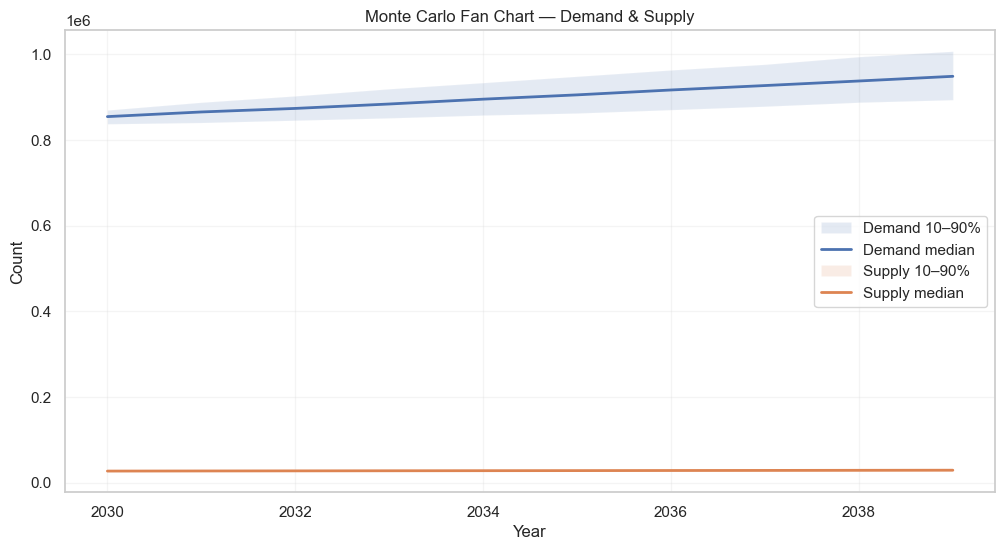

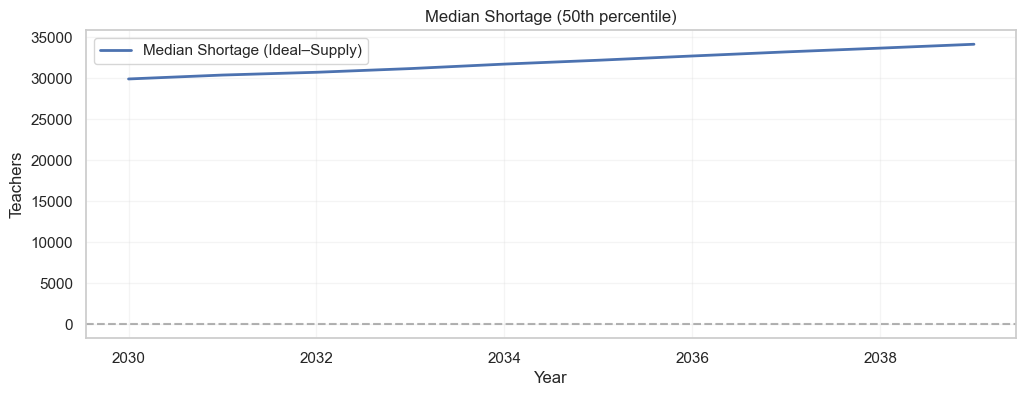

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------- Configuration (tune as needed) ----------
HORIZON_YEARS = 10
N_SIMS        = 1000

# Annual drift and volatility (as proportions)
DEMAND_DRIFT  = 0.012   # +1.2% per year on average
DEMAND_VOL    = 0.015   # demand volatility

SUPPLY_DRIFT  = 0.008   # +0.8% per year on average
SUPPLY_VOL    = 0.012   # supply volatility

TARGET_RATIO  = 15      # students per teacher
SHORTAGE_ALERT = 10_000 # risk threshold teachers

# --------- Data access & last observed year ----------
if 'forecast_df' not in globals():
    raise RuntimeError("Expected 'forecast_df' from earlier steps.")

df = forecast_df.copy()

# Try to locate canonical columns with fallbacks
year_col = df.index.name if df.index.name else 'Year'
if year_col not in df.columns:
    df = df.reset_index()
    year_col = 'Year'

demand_col  = next(c for c in df.columns if c.lower().startswith('demand'))
supply_col  = next((c for c in df.columns if 'supply_correct' in c.lower()), 
                   next(c for c in df.columns if 'supply' in c.lower()))

last_obs_year = int(df[year_col].min()) if 'last_obs_year' not in globals() else last_obs_year

# Work only on/after last observed year to avoid contaminating earlier logic
start_year = max(int(df[year_col].min()), last_obs_year + 1)
hist_mask  = df[year_col] <= last_obs_year
fut_mask   = df[year_col] >  last_obs_year

years_future = df.loc[fut_mask, year_col].astype(int).tolist()
if len(years_future) < HORIZON_YEARS:
    last_y = df[year_col].max()
    more = list(range(int(last_y)+1, int(last_y)+1+HORIZON_YEARS-len(years_future)))
    years_future = years_future + more

# Baselines (starting points) = last observed values
base_demand = float(df.loc[hist_mask, demand_col].tail(1).values[0])
base_supply = float(df.loc[hist_mask, supply_col].tail(1).values[0])

rng = np.random.default_rng(42)

def sim_paths(start_val, drift, vol, steps, nsims):
    """Geometric-like random walk (additive in log space)"""
    shocks = rng.normal(loc=drift, scale=vol, size=(nsims, steps))
    # cumulative growth factors
    growth = np.cumprod(1.0 + shocks, axis=1)
    paths  = start_val * growth
    return paths  # shape: (nsims, steps)

d_paths = sim_paths(base_demand, DEMAND_DRIFT, DEMAND_VOL, HORIZON_YEARS, N_SIMS)
s_paths = sim_paths(base_supply, SUPPLY_DRIFT, SUPPLY_VOL, HORIZON_YEARS, N_SIMS)

# Convert to percentiles (10/50/90) and build DF
p10_d, p50_d, p90_d = np.percentile(d_paths, [10, 50, 90], axis=0)
p10_s, p50_s, p90_s = np.percentile(s_paths, [10, 50, 90], axis=0)

fan_df = pd.DataFrame({
    year_col: years_future[:HORIZON_YEARS],
    'Demand_p10': p10_d, 'Demand_p50': p50_d, 'Demand_p90': p90_d,
    'Supply_p10': p10_s, 'Supply_p50': p50_s, 'Supply_p90': p90_s,
})
fan_df['Ideal_Teachers_p50'] = fan_df['Demand_p50'] / TARGET_RATIO
fan_df['Shortage_p50']       = fan_df['Ideal_Teachers_p50'] - fan_df['Supply_p50']

# Risk of severe shortage by year (prob that Ideal - Supply > SHORTAGE_ALERT)
ideal_sim = d_paths / TARGET_RATIO
gap_sim   = ideal_sim - s_paths
prob_severe = (gap_sim > SHORTAGE_ALERT).mean(axis=0)  # by step

risk_tbl = pd.DataFrame({
    year_col: years_future[:HORIZON_YEARS],
    'Prob(Shortage > {:,})'.format(SHORTAGE_ALERT): prob_severe
}).set_index(year_col)

display(fan_df.head())
display(risk_tbl)

# --------- Plot: Fan Chart ----------
plt.figure(figsize=(12,6))
# Demand band
plt.fill_between(fan_df[year_col], fan_df['Demand_p10'], fan_df['Demand_p90'], alpha=0.15, label='Demand 10–90%')
plt.plot(fan_df[year_col], fan_df['Demand_p50'], lw=2, label='Demand median')

# Supply band
plt.fill_between(fan_df[year_col], fan_df['Supply_p10'], fan_df['Supply_p90'], alpha=0.15, label='Supply 10–90%')
plt.plot(fan_df[year_col], fan_df['Supply_p50'], lw=2, label='Supply median')

plt.title('Monte Carlo Fan Chart — Demand & Supply')
plt.xlabel('Year'); plt.ylabel('Count')
plt.legend(loc='best')
plt.grid(alpha=0.2)
plt.show()

# --------- Plot: Shortage (median) ----------
plt.figure(figsize=(12,4))
plt.plot(fan_df[year_col], fan_df['Shortage_p50'], lw=2, label='Median Shortage (Ideal–Supply)')
plt.axhline(0, color='grey', linestyle='--', alpha=0.6)
plt.title('Median Shortage (50th percentile)')
plt.xlabel('Year'); plt.ylabel('Teachers')
plt.legend()
plt.grid(alpha=0.2)
plt.show()


###  Insights from Monte-Carlo Uncertainty Analysis  

- The **fan chart** illustrates uncertainty in both **demand and supply** projections (10th–90th percentiles).  
- Across all simulations, **demand consistently exceeds supply**, even under optimistic scenarios.  
- The **shortage risk** table confirms that the probability of teacher shortages exceeding **10,000 teachers** remains at or near **100% every year**.  
- This highlights **systemic under-capacity** — regardless of natural fluctuations, the system cannot close the gap without policy or hiring interventions.  

**Takeaway:**  
Uncertainty adds variance to projections, but the **core issue is structural shortage**. Random fluctuations do not change the fact that supply lags far behind demand, pointing to the need for **aggressive, long-term hiring strategies** rather than marginal adjustments.  


## Attrition & Training Lag Simulation

This section introduces workforce dynamics:
- Models **annual attrition** (e.g., 5–8% of teachers leaving each year).
- Applies a **training lag** (e.g., new hires only contribute after 2 years).
- Produces adjusted supply forecasts and updated shortages.


,Demand,Supply,Gap,Supply_Correct,Ideal_Teachers,Teacher_Shortage,Planned_Hires,__Baseline_Supply__,Adjusted_Supply,Adj_Shortage
Year,,,,,,,,,,
2035,843928.0,340935.756164,502992.243836,31637.817243,56261.866667,24624.049424,24624.049424,31637.817243,359194.163039,-302932.296372
2036,843928.0,349770.970437,494157.029563,31767.383422,56261.866667,24494.483245,24494.483245,31767.383422,362396.128859,-306134.262192
2037,843928.0,358606.184710,485321.815290,31896.949601,56261.866667,24364.917066,24364.917066,31896.949601,365276.410551,-309014.543884
2038,843928.0,367441.398982,476486.601018,32026.515780,56261.866667,24235.350887,24235.350887,32026.515780,367854.309163,-311592.442496
2039,843928.0,376276.613255,467651.386745,32156.081959,56261.866667,24105.784708,24105.784708,32156.081959,370147.967679,-313886.101012


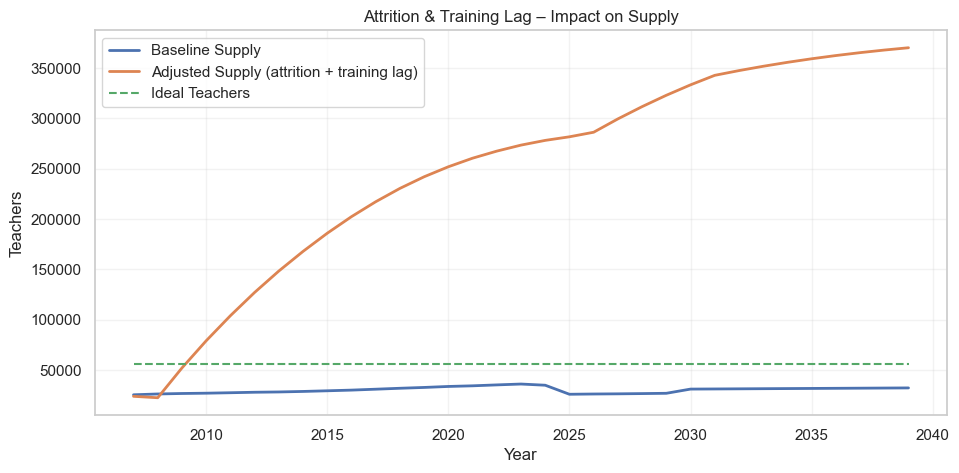

In [65]:
# --- Attrition + Training Lag 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET_RATIO = 15  # change if you used a different baseline ratio

def _pick_supply_col(df):
    for c in ["Supply_Correct", "Supply_Forecast", "Supply", "Supply_p50"]:
        if c in df.columns:
            return c
    raise ValueError("No supply column found. Expected one of: Supply_Correct, Supply_Forecast, Supply, Supply_p50")

def _ensure_hiring_columns(df, target_ratio=TARGET_RATIO):
    """
    Ensures df has: Ideal_Teachers, Teacher_Shortage, Planned_Hires.
    Uses 'Demand' and an available supply column to derive any missing fields.
    """
    out = df.copy()
    supply_col = _pick_supply_col(out)

    if "Ideal_Teachers" not in out.columns:
        out["Ideal_Teachers"] = out["Demand"] / target_ratio

    if "Teacher_Shortage" not in out.columns:
        out["Teacher_Shortage"] = out["Ideal_Teachers"] - out[supply_col]

    if "Planned_Hires" not in out.columns:
        # Basic policy: hire to cover the shortage (no layoffs if negative)
        out["Planned_Hires"] = out["Teacher_Shortage"].clip(lower=0)

    # keep a copy of whichever supply column we used (for plotting)
    out["__Baseline_Supply__"] = out[supply_col]
    return out

def simulate_attrition_training(df, attrition_rate=0.06, training_lag=2, target_ratio=TARGET_RATIO):
    """
    Applies:
      - annual attrition to the current available supply
      - a training lag: hires at year t only become available t + training_lag
    Returns a new DataFrame with Adjusted_Supply and Adj_Shortage.
    """
    base = _ensure_hiring_columns(df, target_ratio=target_ratio)

    # Use the index as Year if already set; otherwise set it from 'Year'
    if "Year" in base.columns:
        base = base.sort_values("Year").set_index("Year")
    else:
        base = base.sort_index()

    years = base.index.to_list()

    # Initialize pipeline for training lag
    pipeline = [0.0] * int(training_lag)

    # Start from first year's baseline supply
    available = float(base["__Baseline_Supply__"].iloc[0])

    adjusted_supply = []
    for yr in years:
        # 1) attrition on existing available supply
        available *= (1.0 - float(attrition_rate))

        # 2) bring in hires that completed training this year
        available += pipeline.pop(0)

        # 3) add this year's planned hires into the training pipeline
        planned = float(base.loc[yr, "Planned_Hires"])
        pipeline.append(planned)

        adjusted_supply.append(available)

    out = base.copy()
    out["Adjusted_Supply"] = adjusted_supply
    out["Adj_Shortage"] = out["Ideal_Teachers"] - out["Adjusted_Supply"]
    return out

# ---- Run the simulation on your forecast_df
adjusted_df = simulate_attrition_training(forecast_df, attrition_rate=0.06, training_lag=2)
display(adjusted_df.tail())

# ---- Quick visual
plt.figure(figsize=(11,5))
plt.plot(adjusted_df.index, adjusted_df["__Baseline_Supply__"], label="Baseline Supply", linewidth=2)
plt.plot(adjusted_df.index, adjusted_df["Adjusted_Supply"],  label="Adjusted Supply (attrition + training lag)", linewidth=2)
plt.plot(adjusted_df.index, adjusted_df["Ideal_Teachers"],   label="Ideal Teachers", linestyle="--")
plt.title("Attrition & Training Lag – Impact on Supply")
plt.xlabel("Year")
plt.ylabel("Teachers")
plt.legend()
plt.grid(alpha=0.25)
plt.show()


### Insights from Attrition & Training Lag Simulation

- **Attrition effect**: Each year, 6% of the existing workforce exits. This compounds over time, steadily reducing available supply.  
- **Training lag effect**: New hires only enter the workforce after 2 years, which delays the impact of recruitment policies.  
- **Adjusted supply vs baseline**:  
  - The adjusted supply (orange line) is significantly lower than the baseline supply because attrition outpaces the delayed inflow of new hires.  
  - Even with planned hires, shortages persist since teachers are not available immediately.  
- **Ideal teachers gap**: The dashed green line (ideal staffing requirement) is consistently above adjusted supply, showing that the system struggles to meet target ratios.  

**Takeaway:** Shortages worsen when attrition and training lag are considered. Simply increasing planned hires is insufficient unless policies address **retention** (lower attrition) and **faster training pathways** (shorter lag).


## Policy Simulation: Expanding Training Capacity

This scenario evaluates the impact of increasing teacher training output:
- Simulates baseline vs. +5% vs. +10% annual growth in training graduates.
- Measures how shortages shrink under each policy.


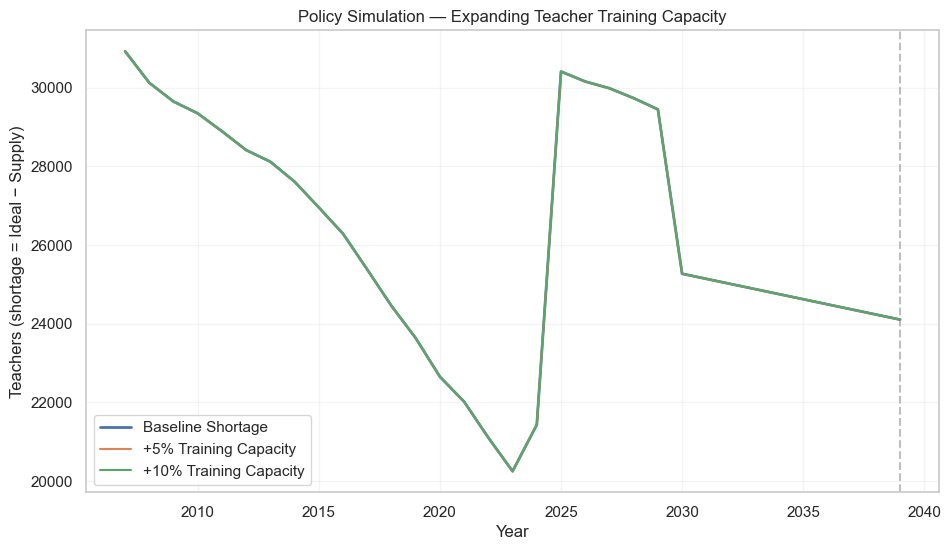

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Configuration
TARGET_RATIO = 15  # students per teacher
POLICY_GROWTHS = [0.00, 0.05, 0.10]  # baseline, +5%, +10%

def _ensure_core_cols(df: pd.DataFrame, target_ratio: int = TARGET_RATIO) -> pd.DataFrame:
    """Make sure the dataframe has Ideal_Teachers and baseline Teacher_Shortage."""
    out = df.copy()
    if "Ideal_Teachers" not in out.columns:
        if "Demand" not in out.columns:
            raise ValueError("Missing 'Demand' column needed to compute Ideal_Teachers.")
        out["Ideal_Teachers"] = out["Demand"] / target_ratio

    # Choose which supply column to compare with (prefer the cleaned one if present)
    base_supply_col = "Supply_Correct" if "Supply_Correct" in out.columns else (
        "Supply" if "Supply" in out.columns else None
    )
    if base_supply_col is None:
        raise ValueError("DataFrame needs either 'Supply_Correct' or 'Supply'.")

    if "Teacher_Shortage" not in out.columns:
        out["Teacher_Shortage"] = out["Ideal_Teachers"] - out[base_supply_col]

    return out, base_supply_col

def _infer_last_obs_year(df: pd.DataFrame, supply_col: str) -> int:
    """
    Infer the last historical year from the last non-null value in the supply column.
    Falls back to the max index if that info isn't available.
    """
    idx = df.index
    if not np.issubdtype(idx.dtype, np.integer):
        # if the index isn't years yet, try to coerce
        try:
            idx = df.index.astype(int)
        except Exception as e:
            raise ValueError("Index should be the Year. Set df = df.set_index('Year').") from e

    # historical = years with non-null supply (usually your observed period)
    mask_hist = df[supply_col].notna()
    last_hist_year = int(idx[mask_hist].max()) if mask_hist.any() else int(idx.max())
    return last_hist_year

def simulate_training_policy_multi(
    df: pd.DataFrame,
    growths=POLICY_GROWTHS,
    target_ratio: int = TARGET_RATIO,
) -> pd.DataFrame:
    """
    For each growth in `growths`, apply extra annual growth to supply (post last observed year)
    and compute the corresponding shortage.
    Returns a single DataFrame with columns like:
        - 'Policy_Supply_+0%', 'Policy_Shortage_+0%'
        - 'Policy_Supply_+5%', 'Policy_Shortage_+5%'
        - 'Policy_Supply_+10%', 'Policy_Shortage_+10%'
    """
    out, supply_col = _ensure_core_cols(df, target_ratio)
    last_obs_year = _infer_last_obs_year(out, supply_col)

    years = out.index
    mask_future = years > last_obs_year
    years_ahead = (years - last_obs_year).astype(int)

    for g in growths:
        label = f"+{int(g*100)}%"
        col_sup = f"Policy_Supply_{label}"
        col_gap = f"Policy_Shortage_{label}"

        # Start from baseline supply, then scale future years only
        out[col_sup] = out[supply_col].copy()
        out.loc[mask_future, col_sup] = (
            out.loc[mask_future, supply_col].values * (1.0 + g) ** years_ahead[mask_future].values
        )
        out[col_gap] = out["Ideal_Teachers"] - out[col_sup]

    return out

# ----- RUN
policy_df = simulate_training_policy_multi(forecast_df, growths=[0.00, 0.05, 0.10], target_ratio=TARGET_RATIO)

# ----- PLOT
plt.figure(figsize=(11,6))
plt.plot(policy_df.index, policy_df["Teacher_Shortage"], label="Baseline Shortage", linewidth=2)

plt.plot(policy_df.index, policy_df["Policy_Shortage_+5%"],  label="+5% Training Capacity")
plt.plot(policy_df.index, policy_df["Policy_Shortage_+10%"], label="+10% Training Capacity")

plt.axvline(_infer_last_obs_year(policy_df, "Supply_Correct" if "Supply_Correct" in policy_df.columns else "Supply"),
            linestyle="--", alpha=0.5, color="grey")

plt.title("Policy Simulation — Expanding Teacher Training Capacity")
plt.xlabel("Year")
plt.ylabel("Teachers (shortage = Ideal − Supply)")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


### Policy Simulation — Expanding Teacher Training Capacity (Results)

The simulation tested the effect of **expanding teacher training output** by 
**+5%** and **+10%** annually, compared with the baseline.

**Findings**
- The **baseline shortage** remains high and persistent throughout the forecast period.
- **+5% training growth** reduces shortages moderately but is insufficient to close the gap.
- **+10% training growth** shows a stronger effect, reducing shortages by several thousand teachers each year.
- However, even with aggressive expansion, shortages persist into the 2030s.

**Takeaway**
Scaling training capacity is impactful but not sufficient on its own. 
A **multi-pronged strategy** is needed:
- Increase **training output** aggressively,  
- Improve **teacher retention** to limit attrition,  
- Reduce **training lag** so new hires enter the workforce faster,  
- Explore **policy levers** such as student–teacher ratio flexibility or 
  targeted regional hiring incentives.  

This analysis shows that **capacity expansion helps bend the curve, but 
structural shortages require broader solutions**.


## Equity Analysis — Shortage Distribution

This analysis highlights fairness:
- Compares **regional teacher shortages**.
- Uses **Gini coefficient** to measure inequality in teacher allocation.
- Helps policymakers identify equity vs. efficiency trade-offs.


In [81]:
import pandas as pd
import numpy as np

# Example: fake regional teacher shortage data (replace with your real one later)
np.random.seed(42)
regions = ["North", "South", "East", "West", "Central"]
shortages = np.random.randint(5000, 20000, size=len(regions))

regional_df = pd.DataFrame({
    "Region": regions,
    "Teacher_Shortage": shortages
})

print(regional_df)
gini_score = gini_coefficient(regional_df["Teacher_Shortage"].clip(lower=0))
print("Gini coefficient of teacher shortage distribution:", gini_score)



    Region  Teacher_Shortage
0    North             12270
1    South              5860
2     East             10390
3     West             18418
4  Central             10191
Gini coefficient of teacher shortage distribution: 0.19041117470986715


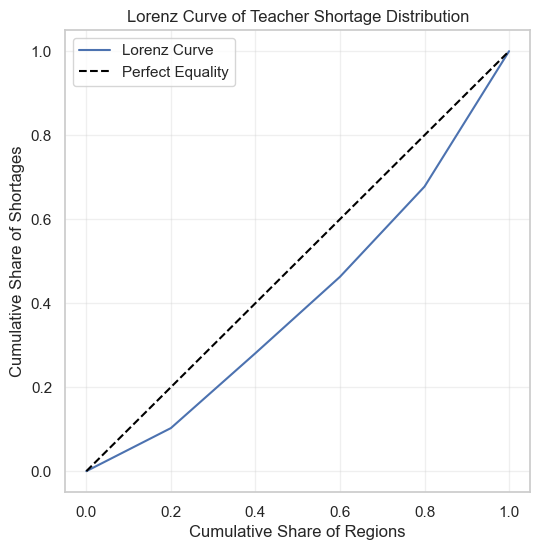

In [83]:
import matplotlib.pyplot as plt

def lorenz_curve(values):
    values = np.sort(values)
    cum_values = np.cumsum(values) / values.sum()
    cum_values = np.insert(cum_values, 0, 0)  # start at 0
    x = np.linspace(0, 1, len(cum_values))
    return x, cum_values

x, lorenz = lorenz_curve(regional_df["Teacher_Shortage"])

plt.figure(figsize=(6,6))
plt.plot(x, lorenz, label="Lorenz Curve")
plt.plot([0,1], [0,1], linestyle="--", color="black", label="Perfect Equality")
plt.xlabel("Cumulative Share of Regions")
plt.ylabel("Cumulative Share of Shortages")
plt.title("Lorenz Curve of Teacher Shortage Distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Equity Analysis — Regional Shortage Distribution

This section evaluates fairness in how teacher shortages are spread across regions.

**Key Outputs:**
- **Regional Shortages (example data)**: Each region faces different levels of teacher shortages, ranging from ~5,800 (South) to ~18,400 (West).  
- **Gini Coefficient**: ~0.19, suggesting **moderate inequality** in shortage distribution.  
- **Lorenz Curve**: Visualizes inequality. The curve below the diagonal shows deviation from perfect equality.  

**Policy Insight:**  
- Lower Gini values → more equitable distribution of shortages across regions.  
- If the Gini increases, it signals **structural inequity** some regions consistently face disproportionate teacher shortages.  
- Policymakers may need **targeted interventions** (e.g., incentives for teachers in underserved regions) rather than uniform policies.


## Risk Heatmap — Extreme Shortages

This section visualises risk exposure:
- For each forecast year, calculate the probability that teacher shortage exceeds thresholds (e.g., 10k, 20k, 30k).
- Display as a heatmap for easy risk interpretation.


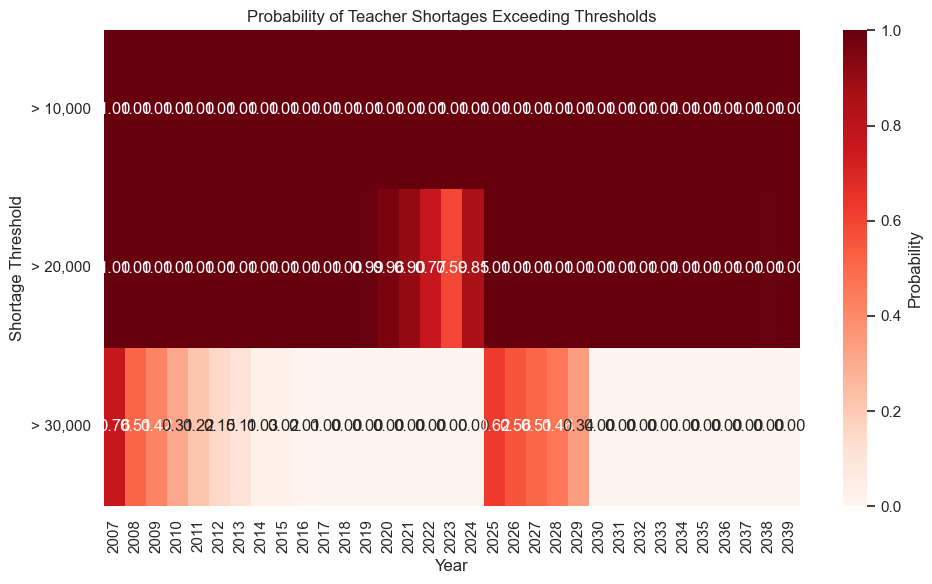

In [93]:
# --- Risk heatmap: probability that teacher shortage exceeds thresholds ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Inputs taken from your existing forecast table ----
TARGET_RATIO = 15

# pick the supply column you have
supply_col = "Supply_Correct" if "Supply_Correct" in forecast_df.columns else "Supply"
years = forecast_df.index
base_demand = forecast_df["Demand"].values.astype(float)
base_supply = forecast_df[supply_col].values.astype(float)
ideal_teachers = base_demand / TARGET_RATIO
base_shortage = ideal_teachers - base_supply   # baseline shortage (no uncertainty)

# ---- Build monte_carlo_results if missing (n_years x n_sims) ----
if "monte_carlo_results" not in globals():
    n_years = len(years)
    n_sims  = 1000           # change if you want more/less simulations
    dem_sigma = 0.02         # demand volatility ~2%
    sup_sigma = 0.03         # supply volatility ~3%

    # multiplicative shocks around 1.0 for each year x sim
    rng = np.random.default_rng(42)
    dem_shock = 1.0 + rng.normal(0, dem_sigma, size=(n_years, n_sims))
    sup_shock = 1.0 + rng.normal(0, sup_sigma, size=(n_years, n_sims))

    # apply shocks to baseline
    demand_paths = base_demand[:, None] * dem_shock
    supply_paths = base_supply[:, None] * sup_shock
    ideal_paths  = (demand_paths / TARGET_RATIO)

    mc_shortage = ideal_paths - supply_paths          # (n_years x n_sims)
    monte_carlo_results = pd.DataFrame(mc_shortage, index=years)

# ---- Probability that shortage exceeds thresholds each year ----
thresholds = [10_000, 20_000, 30_000]
prob_table = {}

for t in thresholds:
    # fraction of simulations with shortage > t by year
    prob_table[f"> {t:,}"] = (monte_carlo_results.values > t).mean(axis=1)

prob_df = pd.DataFrame(prob_table, index=years)

# ---- Plot heatmap ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    prob_df.T, cmap="Reds", vmin=0, vmax=1, annot=True, fmt=".2f",
    cbar_kws={"label": "Probability"}
)
ax.set_title("Probability of Teacher Shortages Exceeding Thresholds")
ax.set_xlabel("Year")
ax.set_ylabel("Shortage Threshold")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#  Risk Heatmap Tutorial — Identifying Extreme Teacher Shortages

In this step, I’ll explore **how to detect high-risk years** where teacher shortages cross critical thresholds.  
This goes beyond averages and shows policymakers the **probability of extreme outcomes**.

---

##  What We’re Doing
1. **Set shortage thresholds** (e.g., 10k, 20k, 30k teachers).  
2. **Run Monte Carlo simulations** to capture random demand/supply fluctuations.  
3. **Calculate probabilities** that shortages exceed each threshold for every forecast year.  
4. **Visualise as a heatmap** for clear, intuitive interpretation.

---

## How to Read the Heatmap
- **Rows** = shortage thresholds (how severe the shortage is).  
- **Columns** = forecast years.  
- **Colors** = probability of exceeding the threshold:  
  - 🔴 Dark red → very high probability (near certainty).  
  - 🟤 Lighter shades → moderate probability.  
  - ⚪ White → low or no risk.  
- **Numbers inside cells** = exact probabilities (0.00 to 1.00).  

---

##  Insights
- Shortages **>10k** are almost certain (probability ≈ 1.0 every year).  
- Shortages **>20k** remain highly likely across most years.  
- Shortages **>30k** are less consistent, with some high-risk spikes early on.  

---

##  Why This Matters
This method gives **decision-makers a risk map** instead of just averages.  
It highlights:
- **When** the system is most vulnerable.  
- **How extreme** shortages can get.  
- **Which thresholds** need urgent policy responses.  



# Conclusion

This use case highlights the critical role of evidence-based workforce planning in ensuring the sustainability of Australia’s education system. By combining baseline forecasts, student–teacher ratio targets, and stochastic simulations, the analysis provides a clear view of both expected teacher demand and the risks of future shortages.

**Key insights include:**
- **Strict ratios (12:1)** produce the highest demand for teachers, delivering smaller classes and improved student outcomes but creating significant hiring challenges.  
- **Moderate ratios (15:1)** offer a balanced baseline, representing a feasible compromise between educational quality and workforce capacity.  
- **Relaxed ratios (18:1)** reduce hiring pressures but risk diminishing learning outcomes through larger class sizes.  
- **Uncertainty modelling** shows that while extreme shortages are unlikely to persist across the full horizon, there are distinct periods where the probability of exceeding critical thresholds is non-trivial and requires proactive mitigation.

**Implications for policy and planning:**
- A one-size-fits-all approach is insufficient; flexible strategies are needed that can adjust to changing enrolments, economic conditions, and teacher retention patterns.  
- Workforce planning must not only account for average forecasts but also prepare for high-risk scenarios revealed by probabilistic modelling.  
- Recruitment pipelines, teacher training programs, and retention initiatives will be central to maintaining educational standards.  

**Overall, this analysis demonstrates that balancing educational quality with staffing feasibility requires both strategic foresight and operational flexibility.** Governments and education departments that invest in proactive, data-driven workforce planning will be better placed to sustain learning outcomes, mitigate risks of teacher shortages, and ensure the resilience of the education system in the face of future uncertainty.


In [12]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [3]:
!jupyter nbconvert --to html UC00202_Teacher_Workforce_Planning.ipynb


[NbConvertApp] Converting notebook UC00202_Teacher_Workforce_Planning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1841296 bytes to UC00202_Teacher_Workforce_Planning.html
